# <center>Porto Seguro Safe Driver Prediction </center>

<h6> - P Hemanth Sagar </h6>

<p style='text-align: justify;'>"<b><i>Had an accident ? We are here for you</i></b>" is the dialogue where every insurance company tells to their customers.

<p style='text-align: justify;'><br>An Insurance claim is a process wherein an insured asks the insurance company to compensate him/her for the damages which he had done. As promised by many insurance companies, you are expected to get paid for the loss. Many of us sometime find ourselves in a situation when our vehicle is damaged and we try to claim for the insurance, bit at times we might be the best drivers and we do not do any accidents and damage to our own vehicles in this type of situation we feel that we are paying for the insurance and not using it and every year when renewal time is arriving we think that the previous year’s insurance amount which we had paid has gone in vain, Many customers has this feeling when they are paying more when they are safe.</p>

<p style='text-align: justify;'><br>Insurance is a topic that has been researched more broadly in today’s perspective. In today’s journey insurance industries has an important role than ever before, Insurance company are thinking in client’s perspective by giving them the standard product offerings with common pricing and features. Here the Data is playing a central role and is carrying the big asset in the insurance industry. By analyzing the data and using various algorithms and techniques by machines we can support the insurers .By keeping all these views a company name Porto Seguro, which is one of the largest Auto and homeowner insurance companies in Brazil they completely agrees that they are inaccuracies in car insurance , the company says that the insurance claim prediction which needs to be solved because the good driver are paying more even they’re safe than the bad ones. 

<h6> Problems</h6>
 
- Inaccuracies in car insurance company’s claim predictions raise the cost of insurance for good drivers and reduce the price for bad ones.

<br>In this case study we have to build a model that will <b>predict the probability whether the driver will file an insurance claim next year</b>. </p>


## Problem Statement

 - To predict the probability whether the driver will file an insurance claim next year.

## Type 

 - Binary Classification.

##  Objectives and Constraints 

 - To Predict with Best Possible Score.
 - There are no Low Latency Constraints.

## Performance Metric

 - Gini Coefficient.

<p style='text-align: justify;'> Gini impurity measures the degree or probability of a particular variable being wrongly classified when it is randomly chosen. 

<br>The degree of Gini index varies between 0 and 1, where 0 denotes that all elements belong to a certain class or if there exists only one class, and 1 denotes that the elements are randomly distributed across various classes. A Gini Index of 0.5 denotes equally distributed elements into some classes.

<br>
<center><h4>Gini = 1 - ∑<sub>(i=1 to n)</sub> [ P(i) ] <sup>2</sup></h4></center>  

<br><center>where <b>P[i]</b> is the probability of an object being classified to a particular class.</center>

The Gini Coefficient ranges from approximately 0 for random guessing, to approximately 0.5 for a perfect score. 

<br>The theoretical maximum for the discrete calculation is (1 - frac_pos) / 2.</p>

### Importing Packages

In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import sklearn as sk

### Reading The Data

In [3]:
x=pd.read_csv('train.csv')

In [4]:
x.shape

(595212, 59)

 - In this Porto Seguro's there are <b>595212</b> Datapoints and <b>59</b> Features.

In [5]:
x.head(2)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0


In [6]:
# Setting the Maximum Number Columns To Be Displayed

pd.set_option('display.max_columns', 100)

In [7]:
x.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


 - One target column signifies whether or not a claim was filed for that policy holder
 - One client ID.
 - ps means Porto Seguro’s.
 - _bin to indicate binary features.
 - _cat to indicate categorical features.
 - 'ind' is related to individual or driver.
 - 'reg" is related to region.
 - 'car" is related to car.
 - "calc"is related to calculated feature.


In [8]:
x.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.012451,7.299922,0.660823,0.121081,0.153446,0.610991,0.439184,0.551102,8.295933,0.829931,-0.504899,0.725192,-0.157732,6.555340,0.910027,0.832080,1.328890,0.992136,62.215674,2.346072,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.127545,3.546042,0.473430,0.326222,0.360417,0.287643,0.404264,0.793506,2.508270,0.375716,0.788654,2.153463,0.844417,5.501445,0.347106,0.373796,0.978747,0.091619,33.012455,0.832548,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,1.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.400000,0.200000,0.525000,7.000000,1.000000,-1.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,32.000000,2.000000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000,0.700000,0.300000,0.720677,7.000000,1.000000,-1.000000,0.000000,0.000000,7.0000

#### Checking for Missing Values

In [9]:
x.isna().sum()

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0


- In this dataset there are no <b>NaN</b> values.
- Already Missing Values are Handled, i.e. Replaced by <b>-1</b> by Competition Host.

#### Analyzing Handled Missing Values

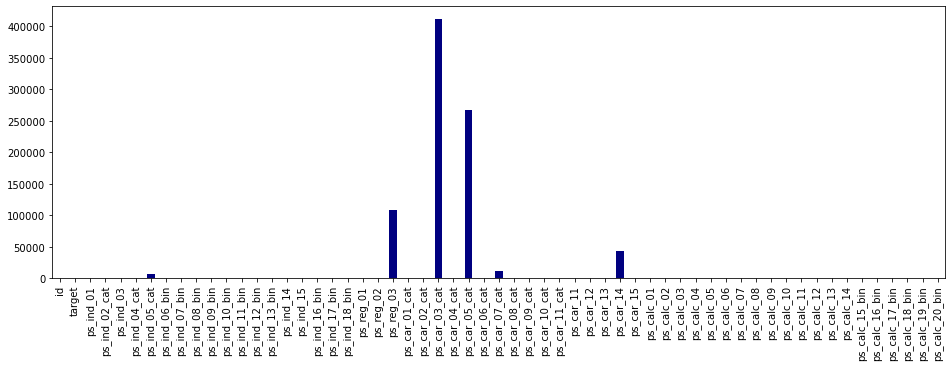

In [10]:
plt.figure(figsize=(16,5))
(x==-1).sum().plot.bar(color='navy')
plt.show()

- Some Columns do have Very High <b>Handled Missing Values</b>.

#### <h6>Percentage Handled Missing Values</h6>

In [11]:
col_names=list(x.columns)

In [12]:
missing_percentages=[]
for i in col_names:
    print("Column name:{}  \nNumber of Missing values:{}  ".format(i,x[i][x[i]==-1].count()))
    print("Percentage of missing values:{}%".format(x[i][x[i]==-1].count()*100/x.shape[0]))
    missing_percentages.append(x[i][x[i]==-1].count()*100/x.shape[0])
    print("*"*60)

Column name:id  
Number of Missing values:0  
Percentage of missing values:0.0%
************************************************************
Column name:target  
Number of Missing values:0  
Percentage of missing values:0.0%
************************************************************
Column name:ps_ind_01  
Number of Missing values:0  
Percentage of missing values:0.0%
************************************************************
Column name:ps_ind_02_cat  
Number of Missing values:216  
Percentage of missing values:0.03628959093566662%
************************************************************
Column name:ps_ind_03  
Number of Missing values:0  
Percentage of missing values:0.0%
************************************************************
Column name:ps_ind_04_cat  
Number of Missing values:83  
Percentage of missing values:0.013944611331760785%
************************************************************
Column name:ps_ind_05_cat  
Number of Missing values:5809  
Percentage of miss

- There are some features with missing values with less than 5%,Greater Than 85%,Greater Than 5% and Less Than 25%, Greater Than 25% and Less Than 85% and some features with no missing .

### Handling Missing Values

#### <h6> Less Than <b>5%</b> Missing Features </h6>

- For features with missing values less than 5% drop those rows.

In [12]:
for i in range(0,len(missing_percentages)):
    if missing_percentages[i]<=5 and missing_percentages[i]>0:
        print("\nFeature : {} \nMissing Percentage : {}".format(col_names[i],missing_percentages[i]))
        Before_Handling=x.shape[0]
        x=x[x[col_names[i]]!=-1]
        After_Handling=x.shape[0]
        print("Rows Removed : {}\n".format((Before_Handling-After_Handling)))
        print("*"*60)
        


Feature : ps_ind_02_cat 
Missing Percentage : 0.03628959093566662
Rows Removed : 216

************************************************************

Feature : ps_ind_04_cat 
Missing Percentage : 0.013944611331760785
Rows Removed : 4

************************************************************

Feature : ps_ind_05_cat 
Missing Percentage : 0.975954785857812
Rows Removed : 5728

************************************************************

Feature : ps_car_01_cat 
Missing Percentage : 0.01797678810239041
Rows Removed : 24

************************************************************

Feature : ps_car_02_cat 
Missing Percentage : 0.0008400368272145051
Rows Removed : 5

************************************************************

Feature : ps_car_07_cat 
Missing Percentage : 1.9302366215734899
Rows Removed : 5991

************************************************************

Feature : ps_car_09_cat 
Missing Percentage : 0.09559619093701067
Rows Removed : 393

****************************

#### <h6> Greater Than <b>85%</b> Missing Features </h6>

- For features with missing values greater than 85% drop those columns.

In [13]:
c=0
for i in range(0,len(missing_percentages)):
    if missing_percentages[i]>=85:
        print("\nFeature : {} \nMissing Percentage : {}".format(col_names[i],missing_percentages[i]))
        Before_Handling=x.shape[1]
        x.drop(col_names[i],axis=1,inplace=True)
        After_Handling=x.shape[1]
        print("Columns Removed : {}\n".format((Before_Handling-After_Handling)))
        print("*"*60)
        c+=1
if c==0:
    print("There are no Features With Missing Values > 85%")
        

There are no Features With Missing Values > 85%


#### <h6> Greater Than <b>5%</b> and Less Than <b>25%</b> Missing Features </h6>

- For features with missing values between greater than 5% and less than 25% imputed with mode 

In [14]:
import statistics as stat

c=0
for i in range(0,len(missing_percentages)):
    if missing_percentages[i]>=5 and missing_percentages[i]<=25:
        print("\nFeature : {} \nMissing Percentage : {}".format(col_names[i],missing_percentages[i]))
        Handled_Values=x[col_names[i]][x[col_names[i]]==-1].count()
        x[col_names[i]] = x[col_names[i]].replace(-1,stat.mode(x[col_names[i]][x[col_names[i]]!=-1]))
        print("Number of Values Handled : {}\n".format((Handled_Values)))
        print("*"*60)
        c+=1
if c==0:
    print("There are no Features With Missing Values With Less Than 25% and Greater Than 5%")
        


Feature : ps_reg_03 
Missing Percentage : 18.106489788512327
Number of Values Handled : 106349

************************************************************

Feature : ps_car_14 
Missing Percentage : 7.160473915176441
Number of Values Handled : 40987

************************************************************


#### <h6> Greater Than <b>25%</b> and Less Than <b>85%</b> Missing Features </h6>

- For features with missing values between greater than 25% and less than 85%  use model based imputation techniques

In [15]:
import statistics as stat

c=0
for i in range(0,len(missing_percentages)):
    if missing_percentages[i]>=25 and missing_percentages[i]<=85:
        print("\nFeature : {} \nMissing Percentage : {}".format(col_names[i],missing_percentages[i]))
        print("*"*60)
        c+=1
if c==0:
    print("There are no Features With Missing Values With Less Than 25% and Greater Than 5%")
        


Feature : ps_car_03_cat 
Missing Percentage : 69.08983689844963
************************************************************

Feature : ps_car_05_cat 
Missing Percentage : 44.78253126617071
************************************************************


<h6> Splitting Data For Model Imputation</h6>

In [16]:
# Subsetting Train Data i.e. Data apart from Missing Values

X_T=x[x['ps_car_03_cat']!=-1]
Y_T=X_T['ps_car_03_cat']
X_T.drop('ps_car_03_cat',axis=1,inplace=True)

# Splitting Training Data into Train and Validation Sets

from sklearn.model_selection import train_test_split
X_Train,X_CV,Y_Train,Y_CV=train_test_split(X_T,Y_T,test_size=0.1,stratify=Y_T)

# Subsetting Test Data i.e.  Missing Values Data

X_Test=x[x['ps_car_03_cat']==-1]
X_Test.drop('ps_car_03_cat',axis=1,inplace=True)

<h6>Model Training </h6>

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score,f1_score,log_loss
from tqdm.notebook import tqdm

K=[1,9,27,79,99,197,389,403]
KNN_Scores=[]


for i in tqdm(K):

    KNN=KNeighborsClassifier(n_neighbors=i)

    KNN.fit(X_Train,Y_Train)
    Y_Pred=KNN.predict(X_CV)
    print("{} Neighbors : F1 Score : {}".format(i,f1_score(Y_CV,Y_Pred)))
    KNN_Scores.append(f1_score(Y_CV,Y_Pred))

1 Neighbors : F1 Score : 0.6087207901710431
9 Neighbors : F1 Score : 0.6669259019226614
27 Neighbors : F1 Score : 0.7049186846395484
79 Neighbors : F1 Score : 0.7427703928611101
99 Neighbors : F1 Score : 0.7453831185519697
197 Neighbors : F1 Score : 0.7517771652400986
389 Neighbors : F1 Score : 0.7518758835683473
403 Neighbors : F1 Score : 0.7518758835683473



In [18]:
KNN=KNeighborsClassifier(n_neighbors=389)
KNN.fit(X_Train,Y_Train)
Y_Pred=KNN.predict(X_Test)

In [19]:
c=0
for i in tqdm(list(X_Test['id'])):
    
    x['ps_car_03_cat'][x['id']==i]=Y_Pred[c]
    c+=1

<h6> Splitting Data For Model Imputation</h6>

In [20]:
# Subsetting Train Data i.e. Data apart from Missing Values

X_T=x[x['ps_car_05_cat']!=-1]
Y_T=X_T['ps_car_05_cat']
X_T.drop('ps_car_05_cat',axis=1,inplace=True)

# Splitting Training Data into Train and Validation Sets

from sklearn.model_selection import train_test_split
X_Train,X_CV,Y_Train,Y_CV=train_test_split(X_T,Y_T,test_size=0.1,stratify=Y_T)

# Subsetting Test Data i.e.  Missing Values Data

X_Test=x[x['ps_car_05_cat']==-1]
X_Test.drop('ps_car_05_cat',axis=1,inplace=True)

<h6>Model Training </h6>

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score,f1_score,log_loss
from tqdm.notebook import tqdm

K=[197,389,403,457,509,557]
KNN_Scores=[]

for i in tqdm(K):

    KNN=KNeighborsClassifier(n_neighbors=i)

    KNN.fit(X_Train,Y_Train)
    Y_Pred=KNN.predict(X_CV)
    print("{} Neighbors : F1 Score : {}".format(i,f1_score(Y_CV,Y_Pred)))
    KNN_Scores.append(f1_score(Y_CV,Y_Pred))

197 Neighbors : F1 Score : 0.6232161247609239
389 Neighbors : F1 Score : 0.6454188815896376
403 Neighbors : F1 Score : 0.6474261135007631
457 Neighbors : F1 Score : 0.6516508947597554
509 Neighbors : F1 Score : 0.6553546718689744
557 Neighbors : F1 Score : 0.6565394757601027



In [22]:
KNN=KNeighborsClassifier(n_neighbors=557)
KNN.fit(X_Train,Y_Train)
Y_Pred=KNN.predict(X_Test)

In [23]:
c=0
for i in tqdm(list(X_Test['id'])):
    
    x['ps_car_05_cat'][x['id']==i]=Y_Pred[c]
    c+=1

In [24]:
missing_percentages=[]
for i in col_names:
    print("Column name:{}  \nNumber of Missing values:{}  ".format(i,x[i][x[i]==-1].count()))
    print("Percentage of missing values:{}%".format(x[i][x[i]==-1].count()*100/x.shape[0]))
    missing_percentages.append(x[i][x[i]==-1].count()*100/x.shape[0])
    print("*"*60)

Column name:id  
Number of Missing values:0  
Percentage of missing values:0.0%
************************************************************
Column name:target  
Number of Missing values:0  
Percentage of missing values:0.0%
************************************************************
Column name:ps_ind_01  
Number of Missing values:0  
Percentage of missing values:0.0%
************************************************************
Column name:ps_ind_02_cat  
Number of Missing values:0  
Percentage of missing values:0.0%
************************************************************
Column name:ps_ind_03  
Number of Missing values:0  
Percentage of missing values:0.0%
************************************************************
Column name:ps_ind_04_cat  
Number of Missing values:0  
Percentage of missing values:0.0%
************************************************************
Column name:ps_ind_05_cat  
Number of Missing values:0  
Percentage of missing values:0.0%
***********************

************************************************************
Column name:ps_calc_17_bin  
Number of Missing values:0  
Percentage of missing values:0.0%
************************************************************
Column name:ps_calc_18_bin  
Number of Missing values:0  
Percentage of missing values:0.0%
************************************************************
Column name:ps_calc_19_bin  
Number of Missing values:0  
Percentage of missing values:0.0%
************************************************************
Column name:ps_calc_20_bin  
Number of Missing values:0  
Percentage of missing values:0.0%
************************************************************


- Conclusion:All Missing values  handled in the dataset.

### Exploratory Data Analysis

In [13]:
x.head(2)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0


In [14]:
ps_ind=['ps_ind_01','ps_ind_03','ps_ind_14', 'ps_ind_15']
ps_ind_cat=['ps_ind_02_cat','ps_ind_04_cat', 'ps_ind_05_cat']
ps_ind_bin=['ps_ind_06_bin','ps_ind_06_bin', 'ps_ind_07_bin','ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin','ps_ind_12_bin', 'ps_ind_13_bin','ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin']
ps_reg=['ps_reg_01','ps_reg_02', 'ps_reg_03']
ps_car_cat=['ps_car_01_cat', 'ps_car_02_cat','ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat','ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat','ps_car_11_cat']
ps_car=['ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14','ps_car_15']
ps_calc=['ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04','ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09','ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14']
ps_calc_bin=['ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin','ps_calc_19_bin', 'ps_calc_20_bin']

<h4>Feature : Target</h4>

In [15]:
print(x['target'].value_counts())

0    573518
1     21694
Name: target, dtype: int64


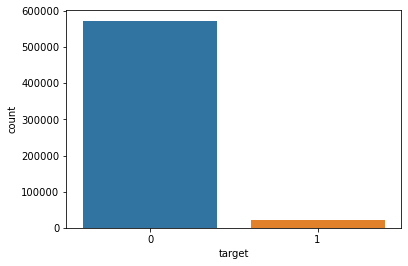

In [16]:
sn.countplot(data=x,x='target')

In [29]:
print("Imbalance Distribution : ")
print("*"*60)
print("Class 1 Datapoints : {}    :  {} %".format((x['target'][x['target']==1].count()),(x['target'][x['target']==1].count()*100)/(x.shape[0])))
print("Class 0 Datapoints : {}   :  {} %".format((x['target'][x['target']==0].count()),(x['target'][x['target']==0].count()*100)/(x.shape[0])))

Imbalance Distribution : 
************************************************************
Class 1 Datapoints : 20742    :  3.558738399614307 %
Class 0 Datapoints : 562105   :  96.44126160038569 %


- The Dataset is <b>Highly Imbalanced</b>.
- <b>96.36 : 3.64</b> 

#### Binary Features

### <h4>Feature : Independent Binary</h4>

In [30]:
print("Number of Independent Binary Features : ", len(ps_ind_bin))

Number of Independent Binary Features :  12


<h6>Count Plots</h6>

<h6>Count plots of Independent Binary Features With Respect To Class label </h6>

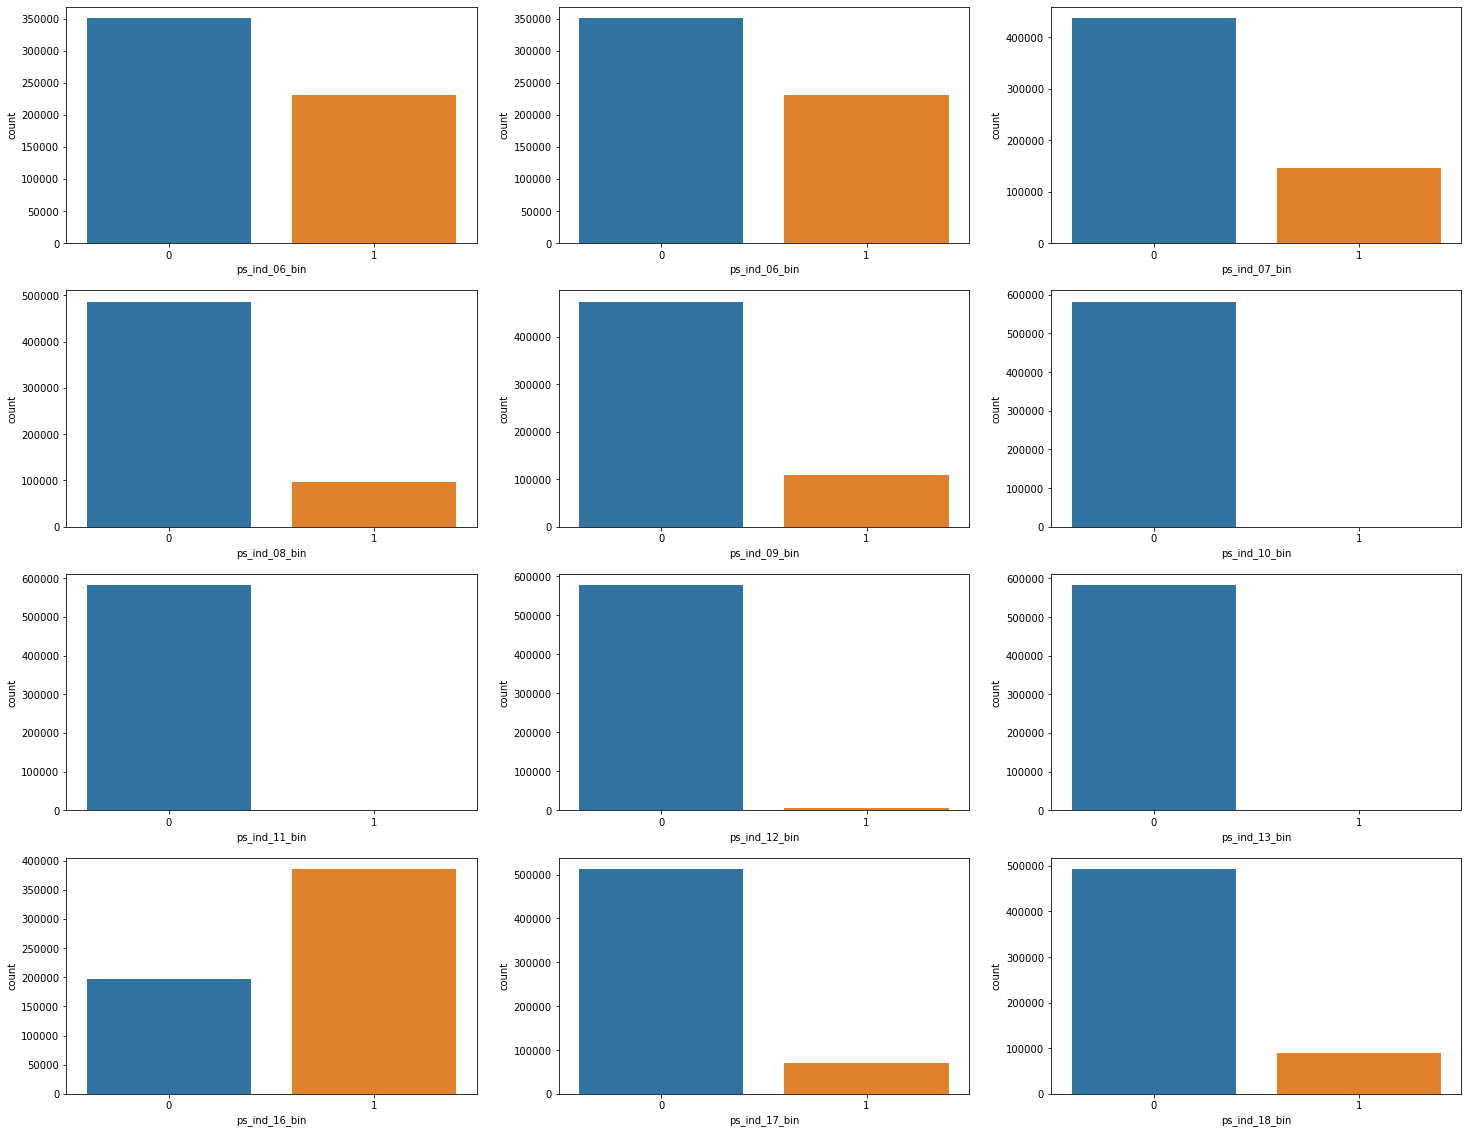

In [31]:
fig, ax = plt.subplots(4, 3)
fig.set_size_inches(25,20)
Col_Count = 0
for i in range(0,4) :
    for j in range(0,3) :
        sn.countplot(x=ps_ind_bin[Col_Count], data =x,ax=ax[i,j])
        Col_Count+=1
plt.show()

- We have plotted count plots for  Independent Binary Features in most of the plots the count for the target 0 is   high and only in one case ps_ind_16_bin the count for the target 1 is high.

<h6>Distribution of Binary Features With Respect To Target Column</h6>

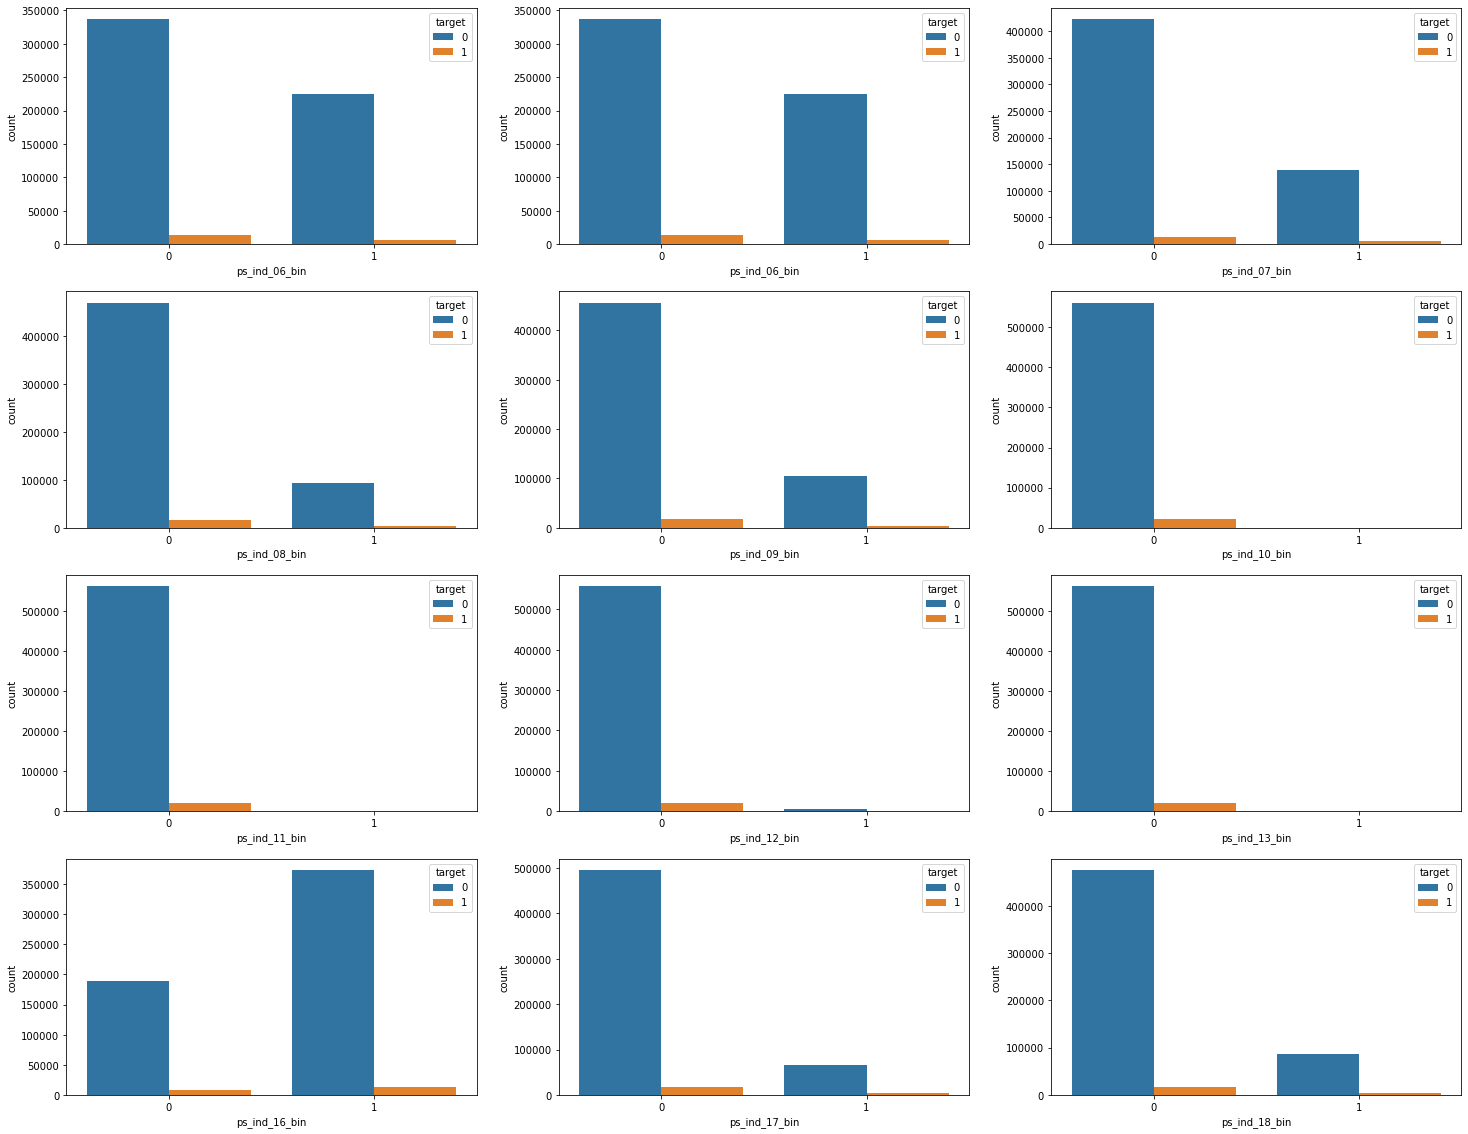

In [32]:
fig, ax = plt.subplots(4, 3)
fig.set_size_inches(25,20)
Col_Count = 0
for i in range(0,4) :
    for j in range(0,3) :
        sn.countplot(x=ps_ind_bin[Col_Count], data =x,ax=ax[i,j],hue='target')
        Col_Count+=1
plt.show()

 - Here we plotted Distribution of Binary Features With Respect To Target Column  Some Features like ps_ind_bin_10, ps_ind_bin_11, ps_ind_bin_13 do have only 1 binary value here we have found  No    Inferences can be drawn out from these plots and One of the reason may even be the Imabalced Data.

#### <h4>Feature : Calculated Binary</h4>

In [33]:
print("Number of Calculated Binary Features : ", len(ps_calc_bin))

Number of Calculated Binary Features :  6


<h6>Count Plots</h6>

<h6>Count plots of Calculated Binary Features With Respect To Class label </h6>

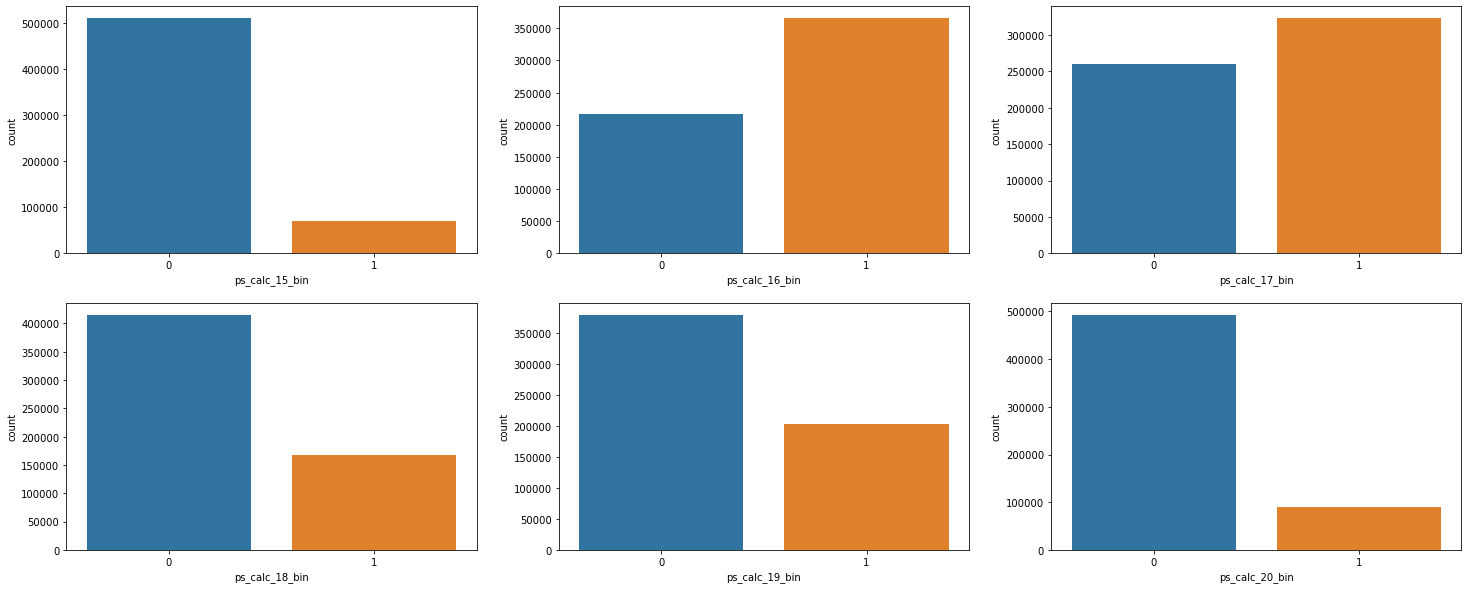

In [34]:
fig, ax = plt.subplots(2, 3)
fig.set_size_inches(25,10)
Col_Count = 0
for i in range(0,2) :
    for j in range(0,3) :
        sn.countplot(x=ps_calc_bin[Col_Count], data =x,ax=ax[i,j])
        Col_Count+=1
plt.show()

- Here we have plotted count plot  for the  Calculated Binary feature The Distribution of these features is also imbalanced.
    Most of the features do have dominant value.

<h6>Distribution of Calculated Binary Features With Respect To Target Column</h6>

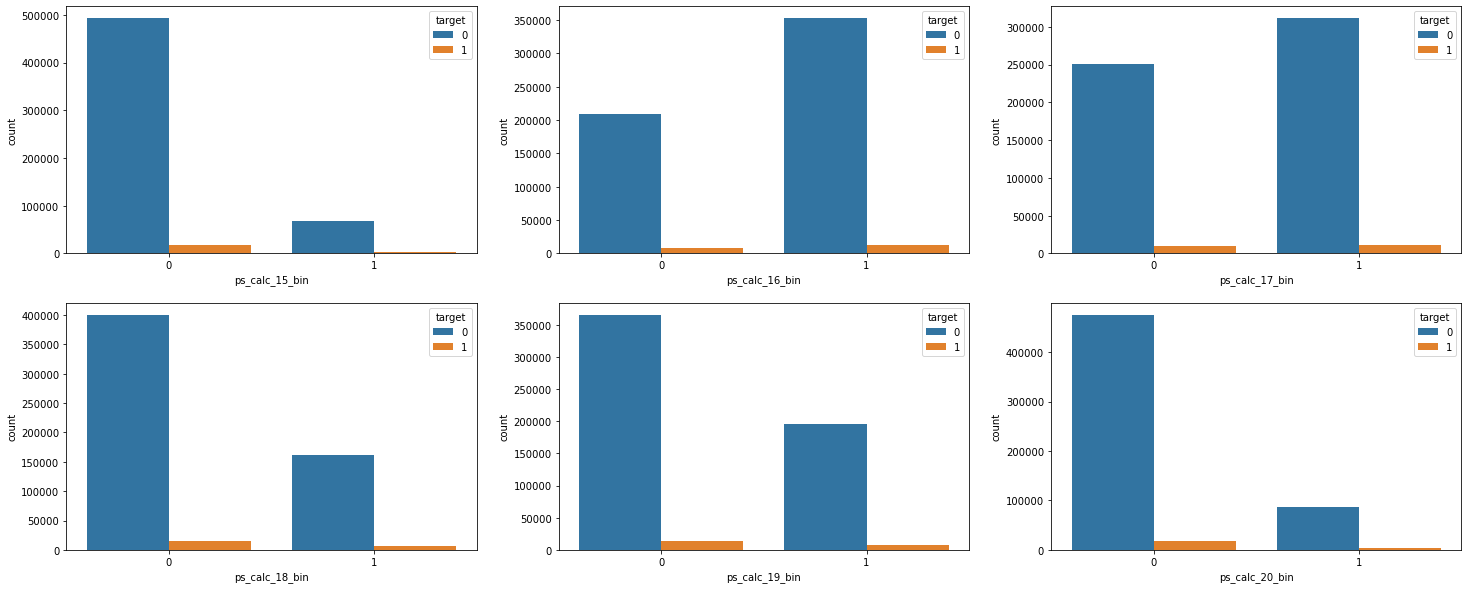

In [35]:
fig, ax = plt.subplots(2, 3)
fig.set_size_inches(25,10)
Col_Count = 0
for i in range(0,2) :
    for j in range(0,3) :
        sn.countplot(x=ps_calc_bin[Col_Count], data =x,ax=ax[i,j],hue='target')
        Col_Count+=1
plt.show()

 - Here we have plotted the Distribution of Calculated Binary Features With Respect To Target Column The probability of the Client Not Claiming the Insurance Policy is Relatively High, if ps_calc_15_bin is 1 and it is not possible to draw the exact inferences as the dataset is Highly Imbalanced and the Dataset is Generated Random Data

#### Feature : Categorical

#### <h4>Feature : Independent Categorical</h4>

In [36]:
print("Number of Independent Categorical Features : ", len(ps_ind_cat))

Number of Independent Categorical Features :  3


In [37]:
for i in ps_ind_cat:
    print("{} Feature  {} Has Unique Values".format(i,len(list(x[i].unique()))))

ps_ind_02_cat Feature  4 Has Unique Values
ps_ind_04_cat Feature  2 Has Unique Values
ps_ind_05_cat Feature  7 Has Unique Values


<h6>Count Plots</h6>

<h6>Count plots for Independent Categorical Features With Respect To Class label </h6>

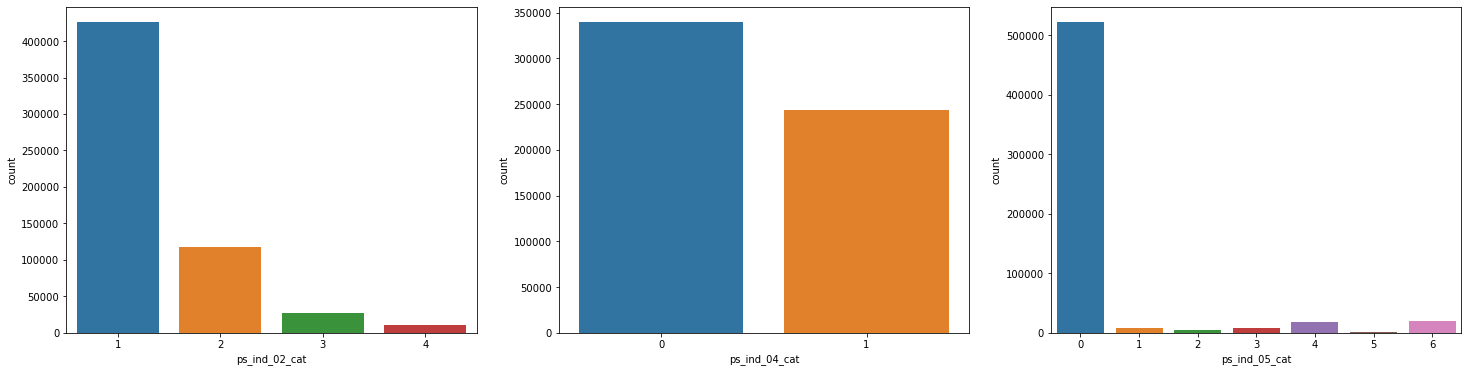

In [38]:
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(25,6)
Col_Count = 0
for i in range(0,3) :
    sn.countplot(x=ps_ind_cat[Col_Count], data =x,ax=ax[i])
    Col_Count+=1
plt.show()

- Here we have plotted count plot for  Independent Categorical feature as the Dataset is uneven distribution of the Categorical Features.ps_ind_02_cat the dominant category is 1 and ps_ind_05_cat the dominant category is 0.

<h6>Distribution of Independent Categorical Features With Respect To Target Column</h6>

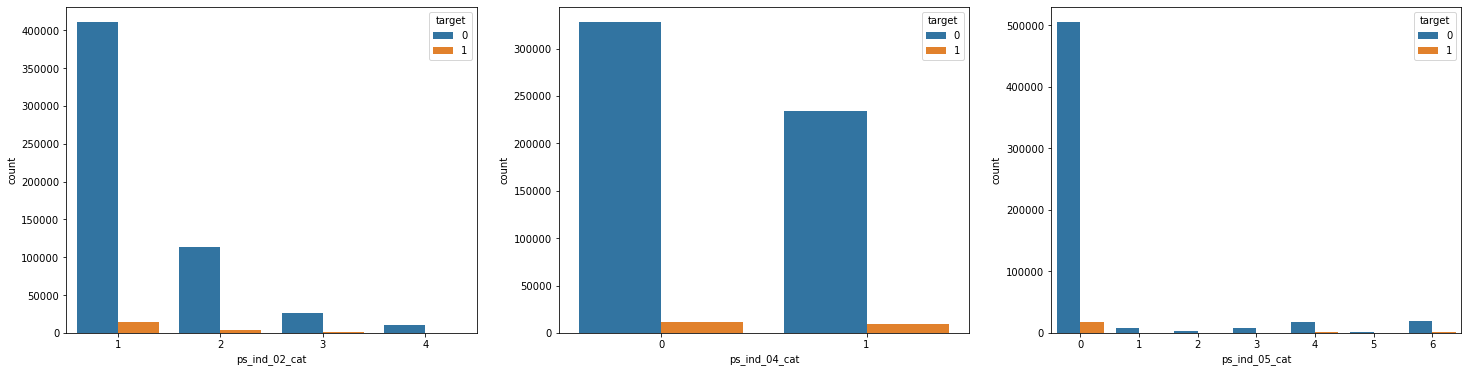

In [39]:
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(25,6)
Col_Count = 0
for i in range(0,3) :
    sn.countplot(x=ps_ind_cat[Col_Count], data =x,ax=ax[i],hue='target')
    Col_Count+=1
plt.show()

 - Here we have plotted the Distribution of Independent Categorical Features With Respect To Target Column and No Inferences can be drawn out.

#### <h4>Feature : Car Categorical</h4>

In [40]:
print("Number of Car Categorical Features : ", len(ps_car_cat))

Number of Car Categorical Features :  11


In [41]:
for i in ps_car_cat:
    print("{} Feature  {} Has Unique Values".format(i,len(list(x[i].unique()))))

ps_car_01_cat Feature  12 Has Unique Values
ps_car_02_cat Feature  2 Has Unique Values
ps_car_03_cat Feature  2 Has Unique Values
ps_car_04_cat Feature  10 Has Unique Values
ps_car_05_cat Feature  2 Has Unique Values
ps_car_06_cat Feature  18 Has Unique Values
ps_car_07_cat Feature  2 Has Unique Values
ps_car_08_cat Feature  2 Has Unique Values
ps_car_09_cat Feature  5 Has Unique Values
ps_car_10_cat Feature  3 Has Unique Values
ps_car_11_cat Feature  104 Has Unique Values


<h6>Count Plots</h6>

<h6>Count plots for Car Categorical Features With Respect To Class label </h6>

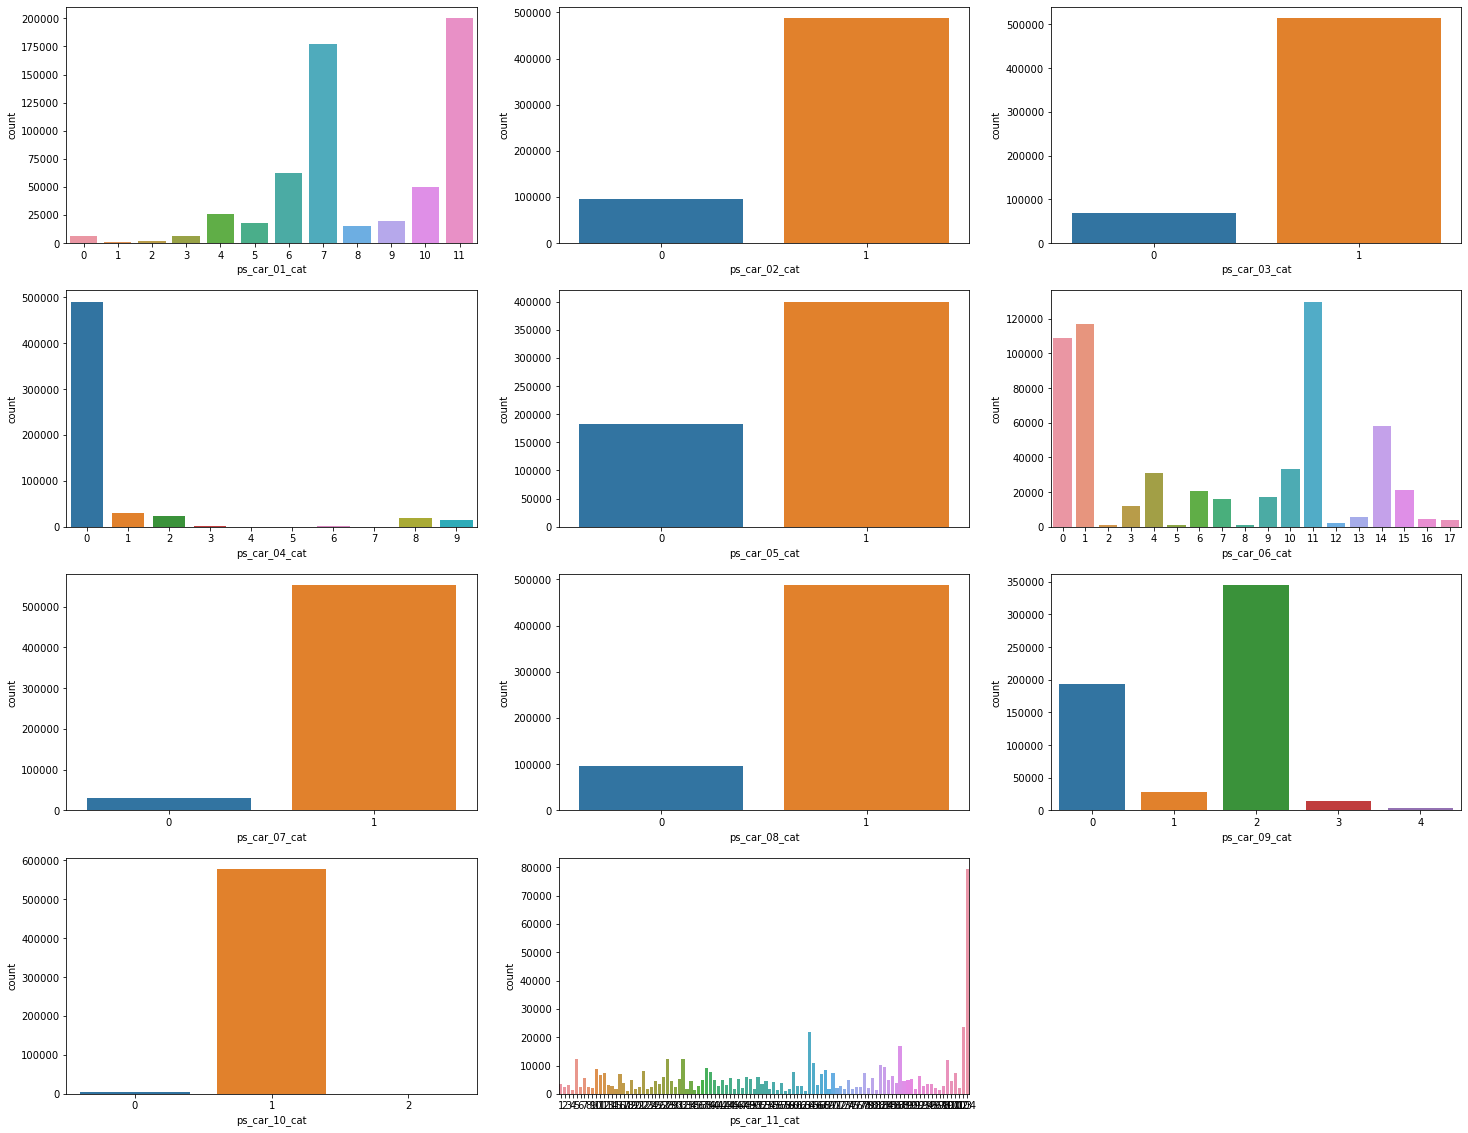

In [42]:
fig, ax = plt.subplots(4, 3)
fig.set_size_inches(25,20)
Col_Count = 0
for i in range(0,4) :
    for j in range(0,3) :
        if Col_Count !=11:
            sn.countplot(x=ps_car_cat[Col_Count], data =x,ax=ax[i,j])
            Col_Count+=1
fig.delaxes(ax= ax[3,2]) 
plt.show()

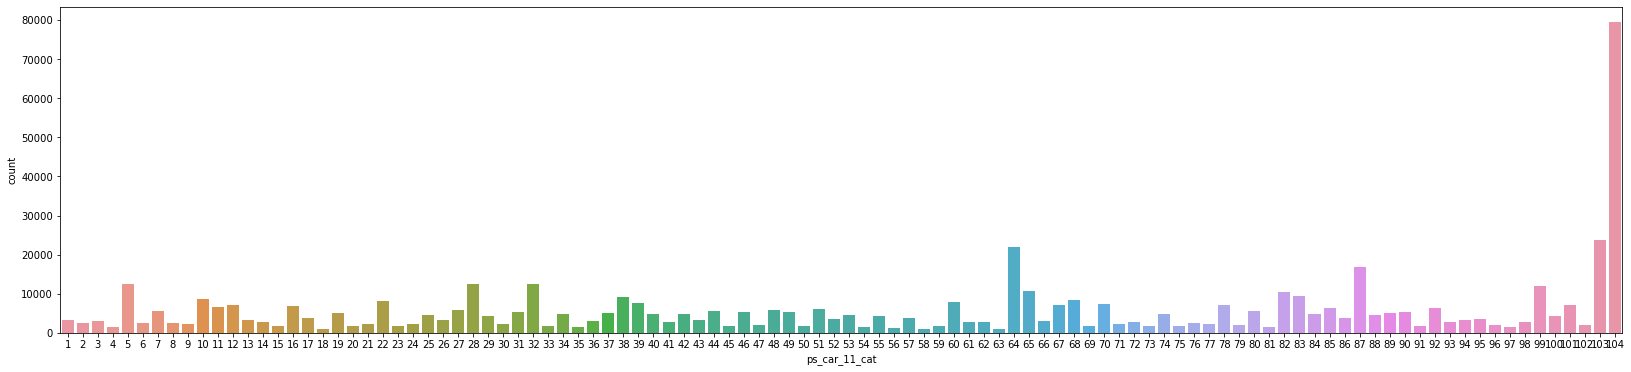

In [43]:
plt.figure(figsize=(28,6))
sn.countplot(x='ps_car_11_cat', data =x)
plt.show()

- Here we have plotted count plots and we observed that  ps_car_11_cat has higher number of Categorical Values and All the Categorical columns are not evenly distributed.

<h6>Distribution of Car Categorical Features With Respect To Target Column</h6>

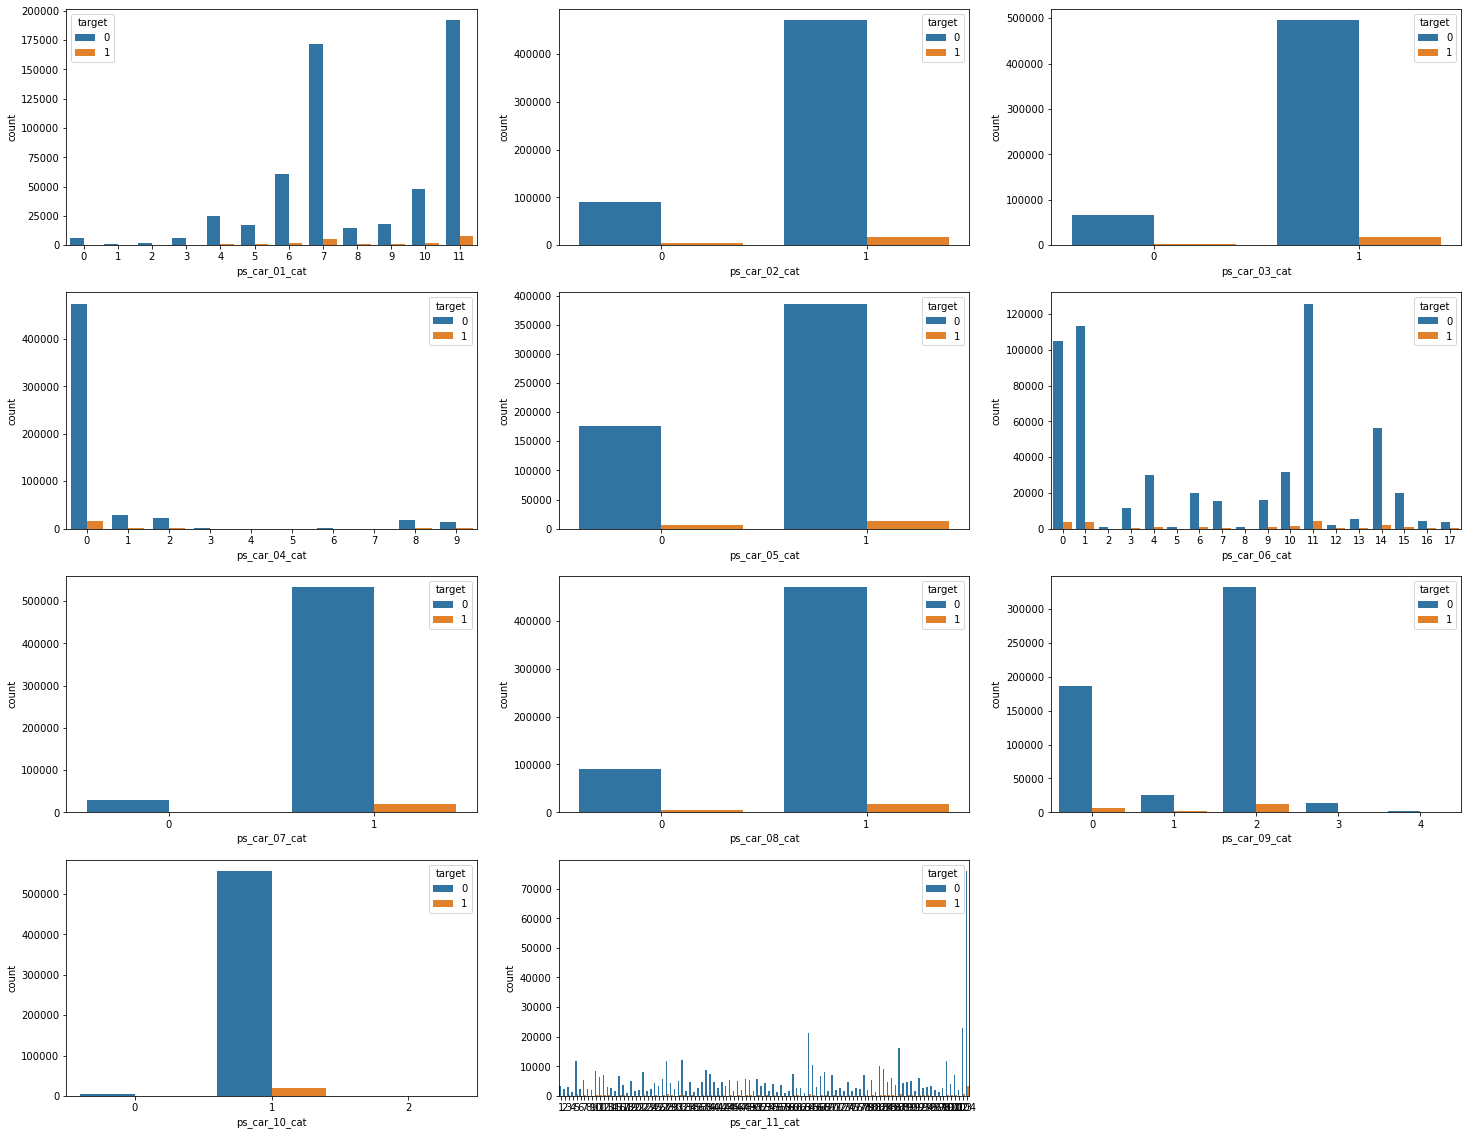

In [44]:
fig, ax = plt.subplots(4, 3)
fig.set_size_inches(25,20)
Col_Count = 0
for i in range(0,4) :
    for j in range(0,3) :
        if Col_Count !=11:
            sn.countplot(x=ps_car_cat[Col_Count], data =x,ax=ax[i,j],hue='target')
            Col_Count+=1
fig.delaxes(ax= ax[3,2]) 
plt.show()

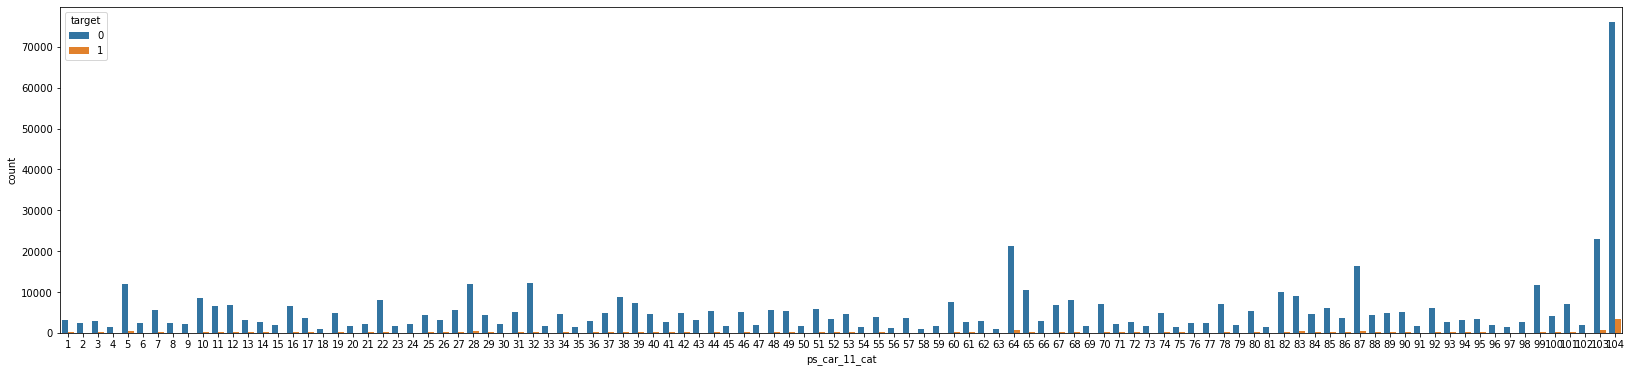

In [45]:
plt.figure(figsize=(28,6))
sn.countplot(x='ps_car_11_cat', data =x,hue='target')
plt.show()

- Here we have plotted the Distribution of Car Categorical Features With Respect To Target Column and we have no inferences from the plot.

#### Feature : Independent

In [46]:
print("Number of Independent Features : ", len(ps_ind))

Number of Independent Features :  4


In [47]:
for i in ps_ind:
    print("{} Feature  {} Has Unique Values".format(i,len(list(x[i].unique()))))

ps_ind_01 Feature  8 Has Unique Values
ps_ind_03 Feature  12 Has Unique Values
ps_ind_14 Feature  5 Has Unique Values
ps_ind_15 Feature  14 Has Unique Values


<h6>Count Plots</h6>

<h6>Count plots of Independent Features With Respect To Class label </h6>

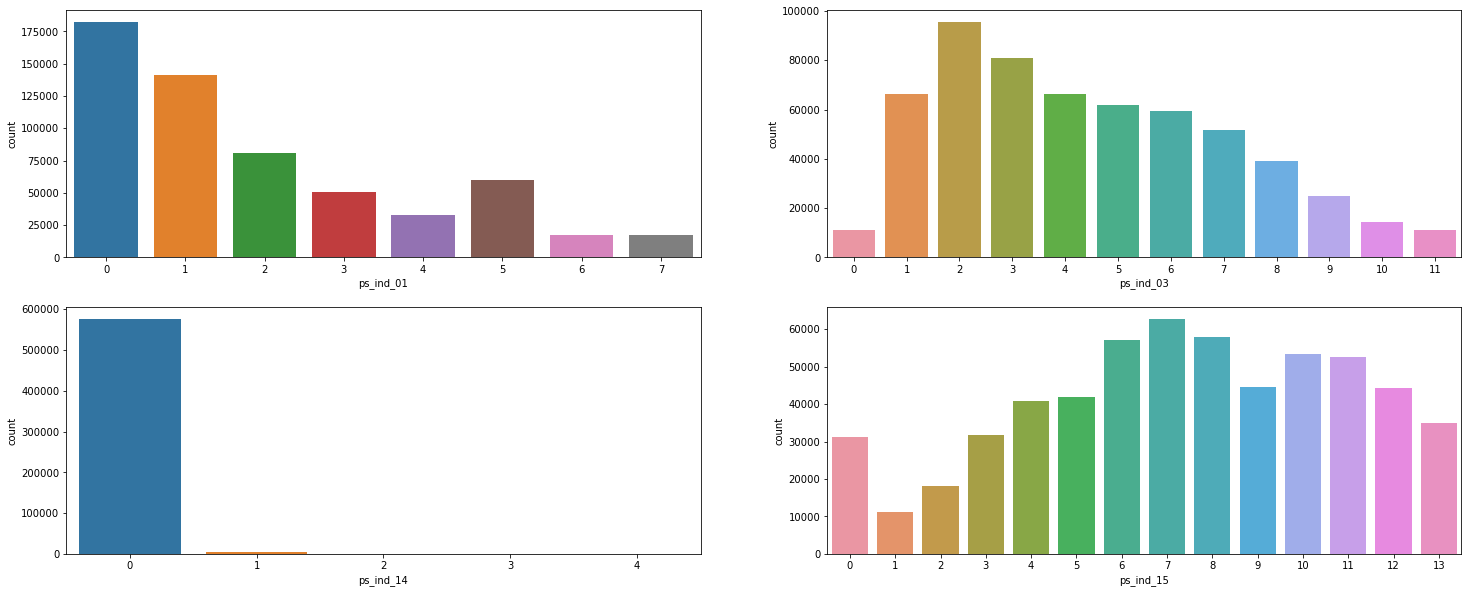

In [48]:
fig, ax = plt.subplots(2, 2)
fig.set_size_inches(25,10)
Col_Count = 0
for i in range(0,2) :
    for j in range(0,2) :
        
            sn.countplot(x=ps_ind[Col_Count], data =x,ax=ax[i,j])
            Col_Count+=1
plt.show()

- Here we have plotted Count plot for the Independent features and in this ps_ind_01 and ps_ind_14 are highly imbalanced and ps_ind_03 and ps_ind_15 is somewhat balanced and no inferences can be found from the above plots

<h6>Distribution of Independent Categorical Features With Respect To Target Column</h6>

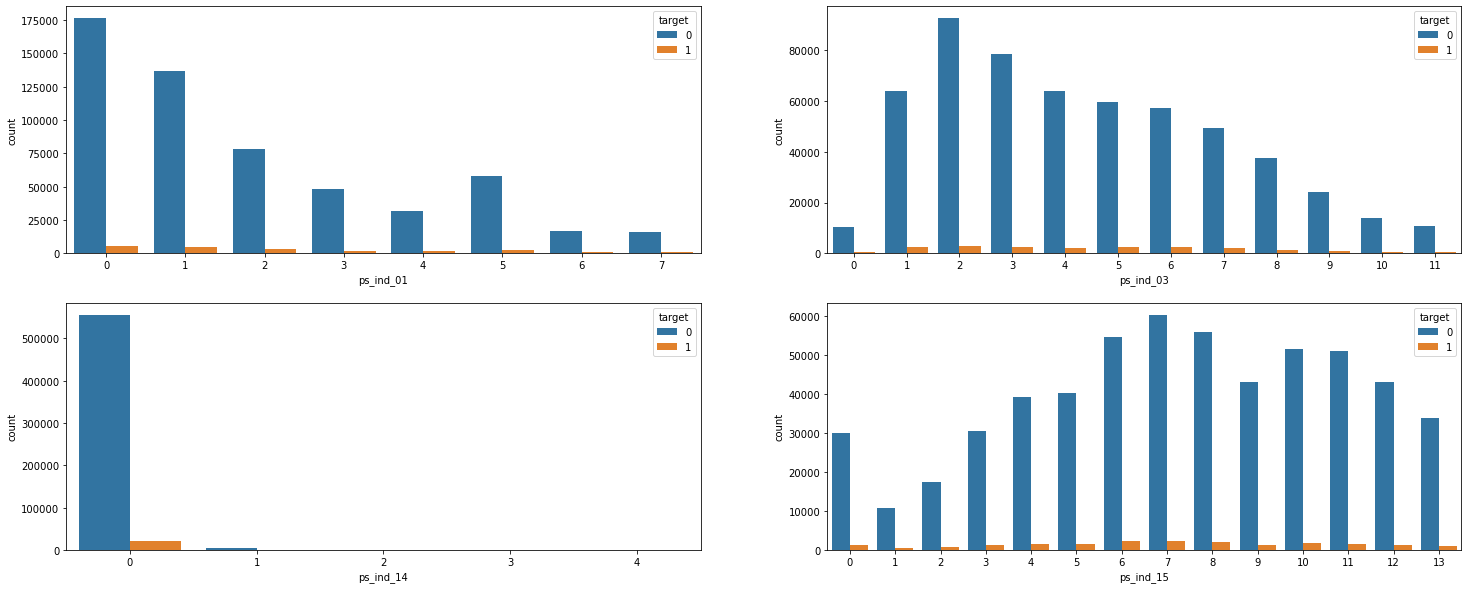

In [49]:
fig, ax = plt.subplots(2, 2)
fig.set_size_inches(25,10)
Col_Count = 0
for i in range(0,2) :
    for j in range(0,2) :
        
            sn.countplot(x=ps_ind[Col_Count], data =x,ax=ax[i,j],hue='target')
            Col_Count+=1
plt.show()

- Distribution of Independent Categorical Features With Respect To Target Column as this dataset is highly imbalanced dataset we cannot find any inferences from the above plots.

#### Feature : Region

In [50]:
print("Number of Car Categorical Features : ", len(ps_reg))

Number of Car Categorical Features :  3


In [51]:
for i in ps_reg:
    print("{} Feature  {} Has Unique Values".format(i,len(list(x[i].unique()))))

ps_reg_01 Feature  10 Has Unique Values
ps_reg_02 Feature  19 Has Unique Values
ps_reg_03 Feature  5004 Has Unique Values


<h6>Count Plots</h6>

<h6>Count plots for Region Features With Respect To Class label </h6>

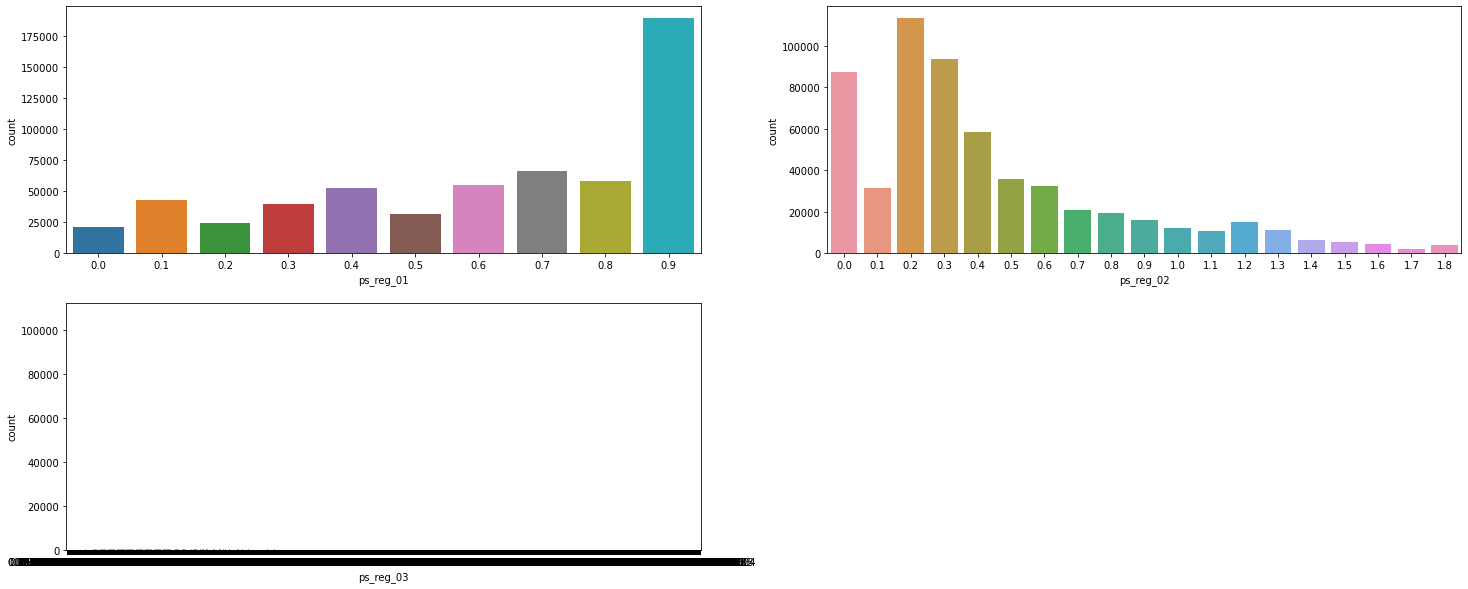

In [52]:
fig, ax = plt.subplots(2, 2)
fig.set_size_inches(25,10)
Col_Count = 0
for i in range(0,2) :
    for j in range(0,2) :
        if Col_Count!=3:
            sn.countplot(x=ps_reg[Col_Count], data =x,ax=ax[i,j])
        Col_Count+=1
fig.delaxes(ax= ax[1,1]) 
plt.show()

- Here we have plotted count plots for the region wise we have 3 regions in the dataset and in ps_reg_03 there are 5004 unique values in it and we observe no inferences from the above plots 

<h6>Distribution of Independent Categorical Features With Respect To Target Column</h6>

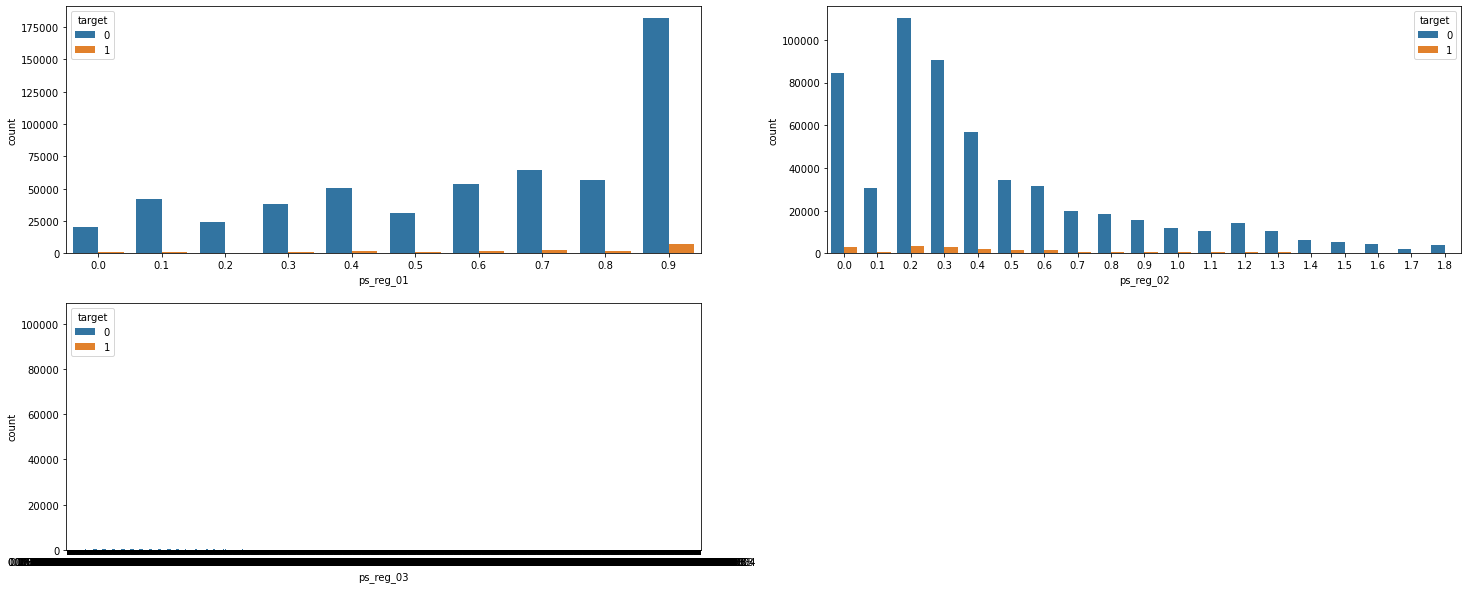

In [53]:
fig, ax = plt.subplots(2, 2)
fig.set_size_inches(25,10)
Col_Count = 0
for i in range(0,2) :
    for j in range(0,2) :
        if Col_Count!=3:
            sn.countplot(x=ps_reg[Col_Count], data =x,ax=ax[i,j],hue='target')
        Col_Count+=1
fig.delaxes(ax= ax[1,1]) 
plt.show()

-  Here we have plotted the Distribution of Independent Categorical Features With Respect To Target Column and we found no inferences from the above plots 

#### Feature : Calculated

In [54]:
print("Number of Calculated Features : ", len(ps_calc))

Number of Calculated Features :  14


<h6>Ditribution Plots</h6>

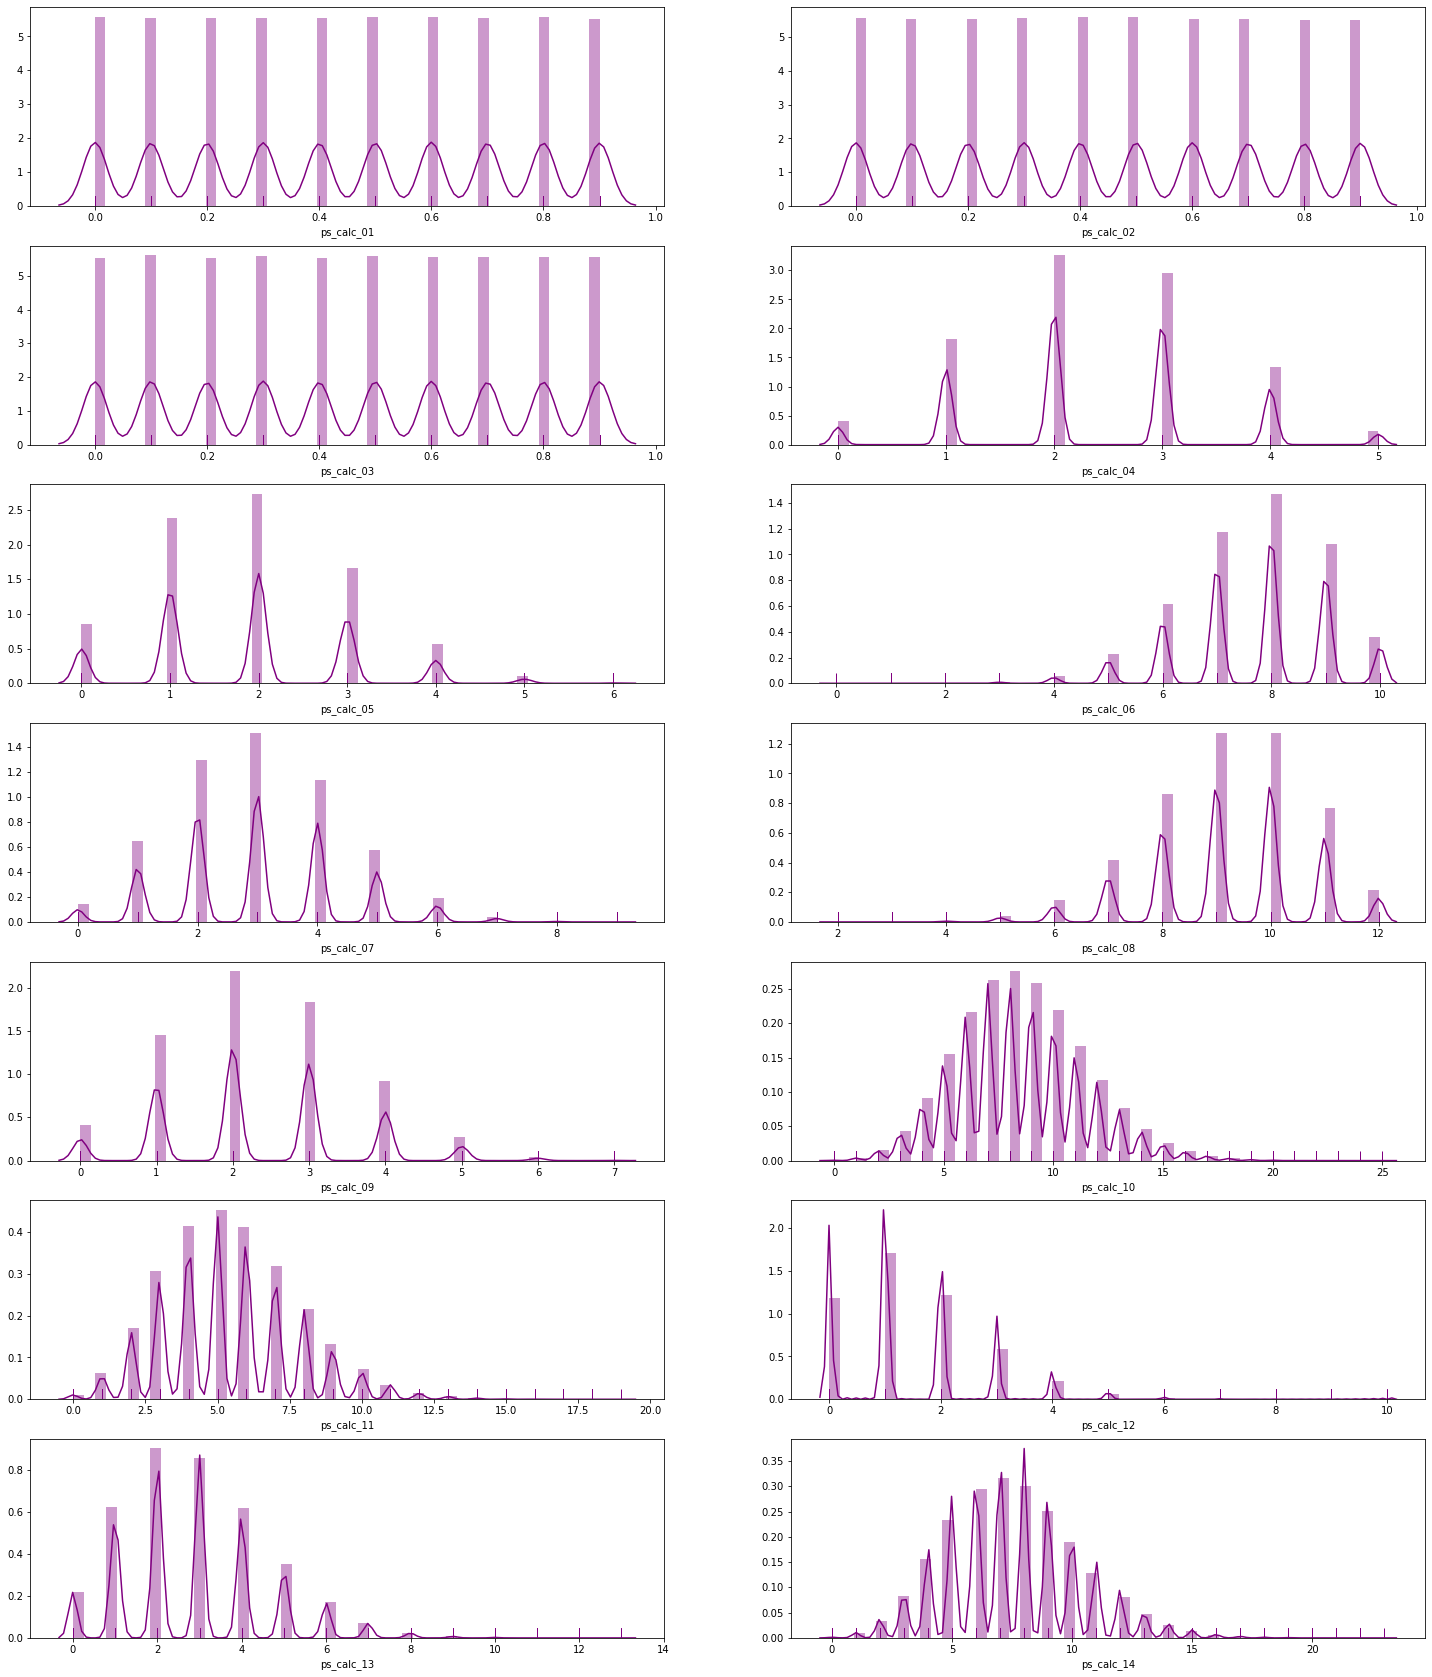

In [55]:
fig, ax = plt.subplots(7, 2)
fig.set_size_inches(25,30)
Col_Count = 0
for i in range(0,7) :
    for j in range(0,2) :        
        sn.distplot(x[ps_calc[Col_Count]], ax=ax[i,j],color='purple',rug=True)
        Col_Count+=1
plt.show()

- Some are evenly distributed
- In ps_calc_05,   In ps_calc_06,  In ps_calc_07,   In ps_calc_08,  In ps_calc_09,  In ps_calc_10,  In ps_calc_11,   In ps_calc_12,  In ps_calc_13, In ps_calc_14 in all these calculated features most of the data points are concentrated at different levels and the calculated features are randomly generated datapoints in the data 

<h6>Distribution of Calculated Features With Respect To Target Column</h6>

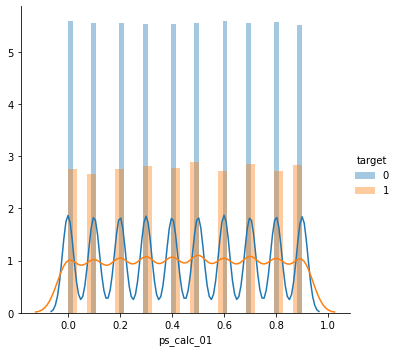

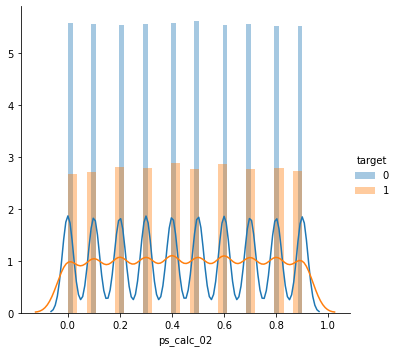

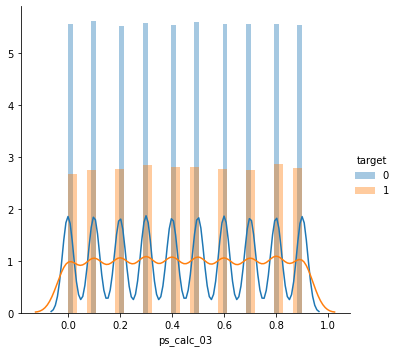

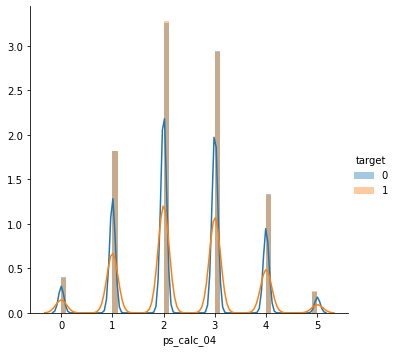

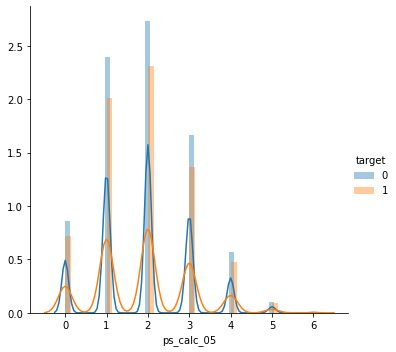

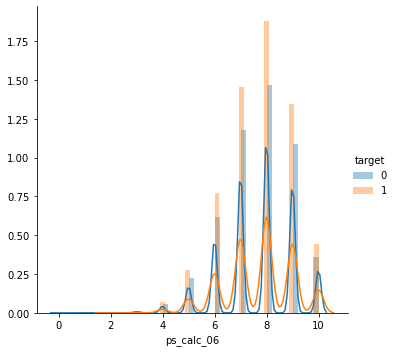

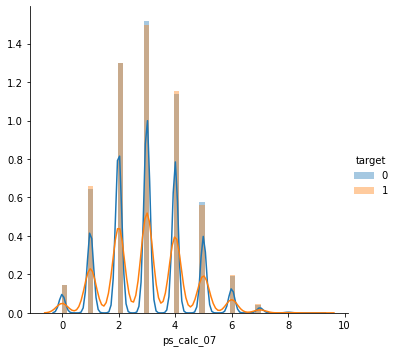

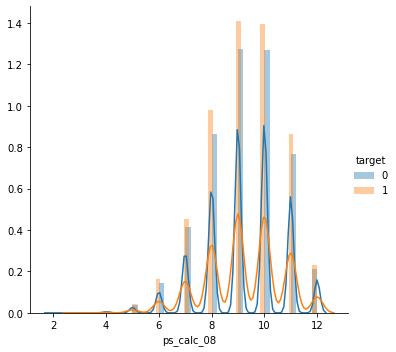

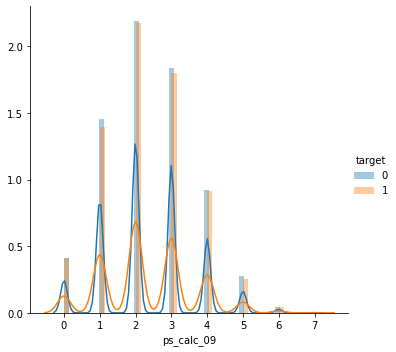

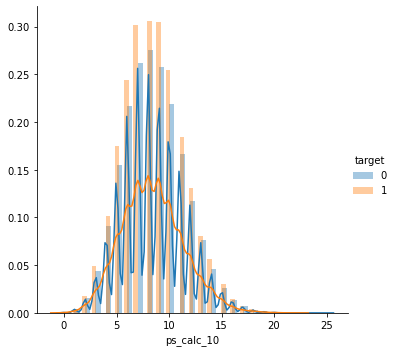

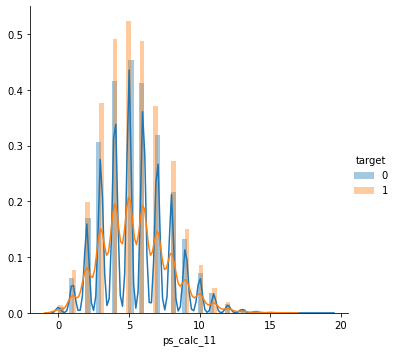

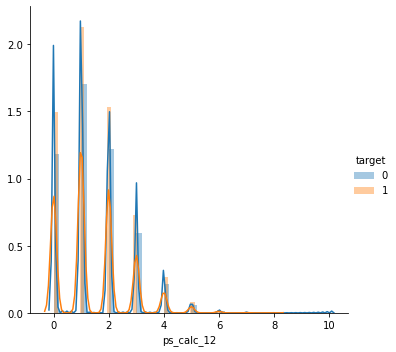

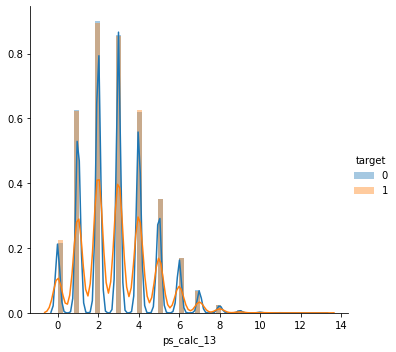

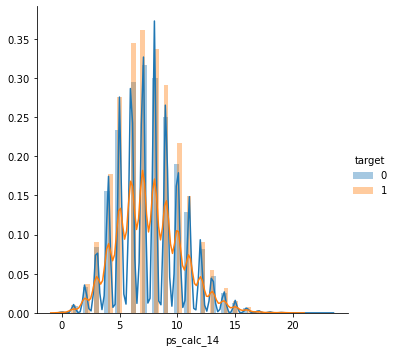

In [56]:
Col_Count = 0
for i in range(0,7) :
    for j in range(0,2) :        
        sn.FacetGrid(data = x, hue = 'target',size=5).map(sn.distplot,ps_calc[Col_Count]).add_legend()
        Col_Count+=1

 - These Features are mentioned as continous, but most of them do have very fewer values,Some Features from the above can be treated as Discrete Features,Even these features are unevenly distributed and finally  No Useful Inferences can be drawn out.

### Box Plot 

<h6>Box plots for calculated Features With Respect To target column </h6>

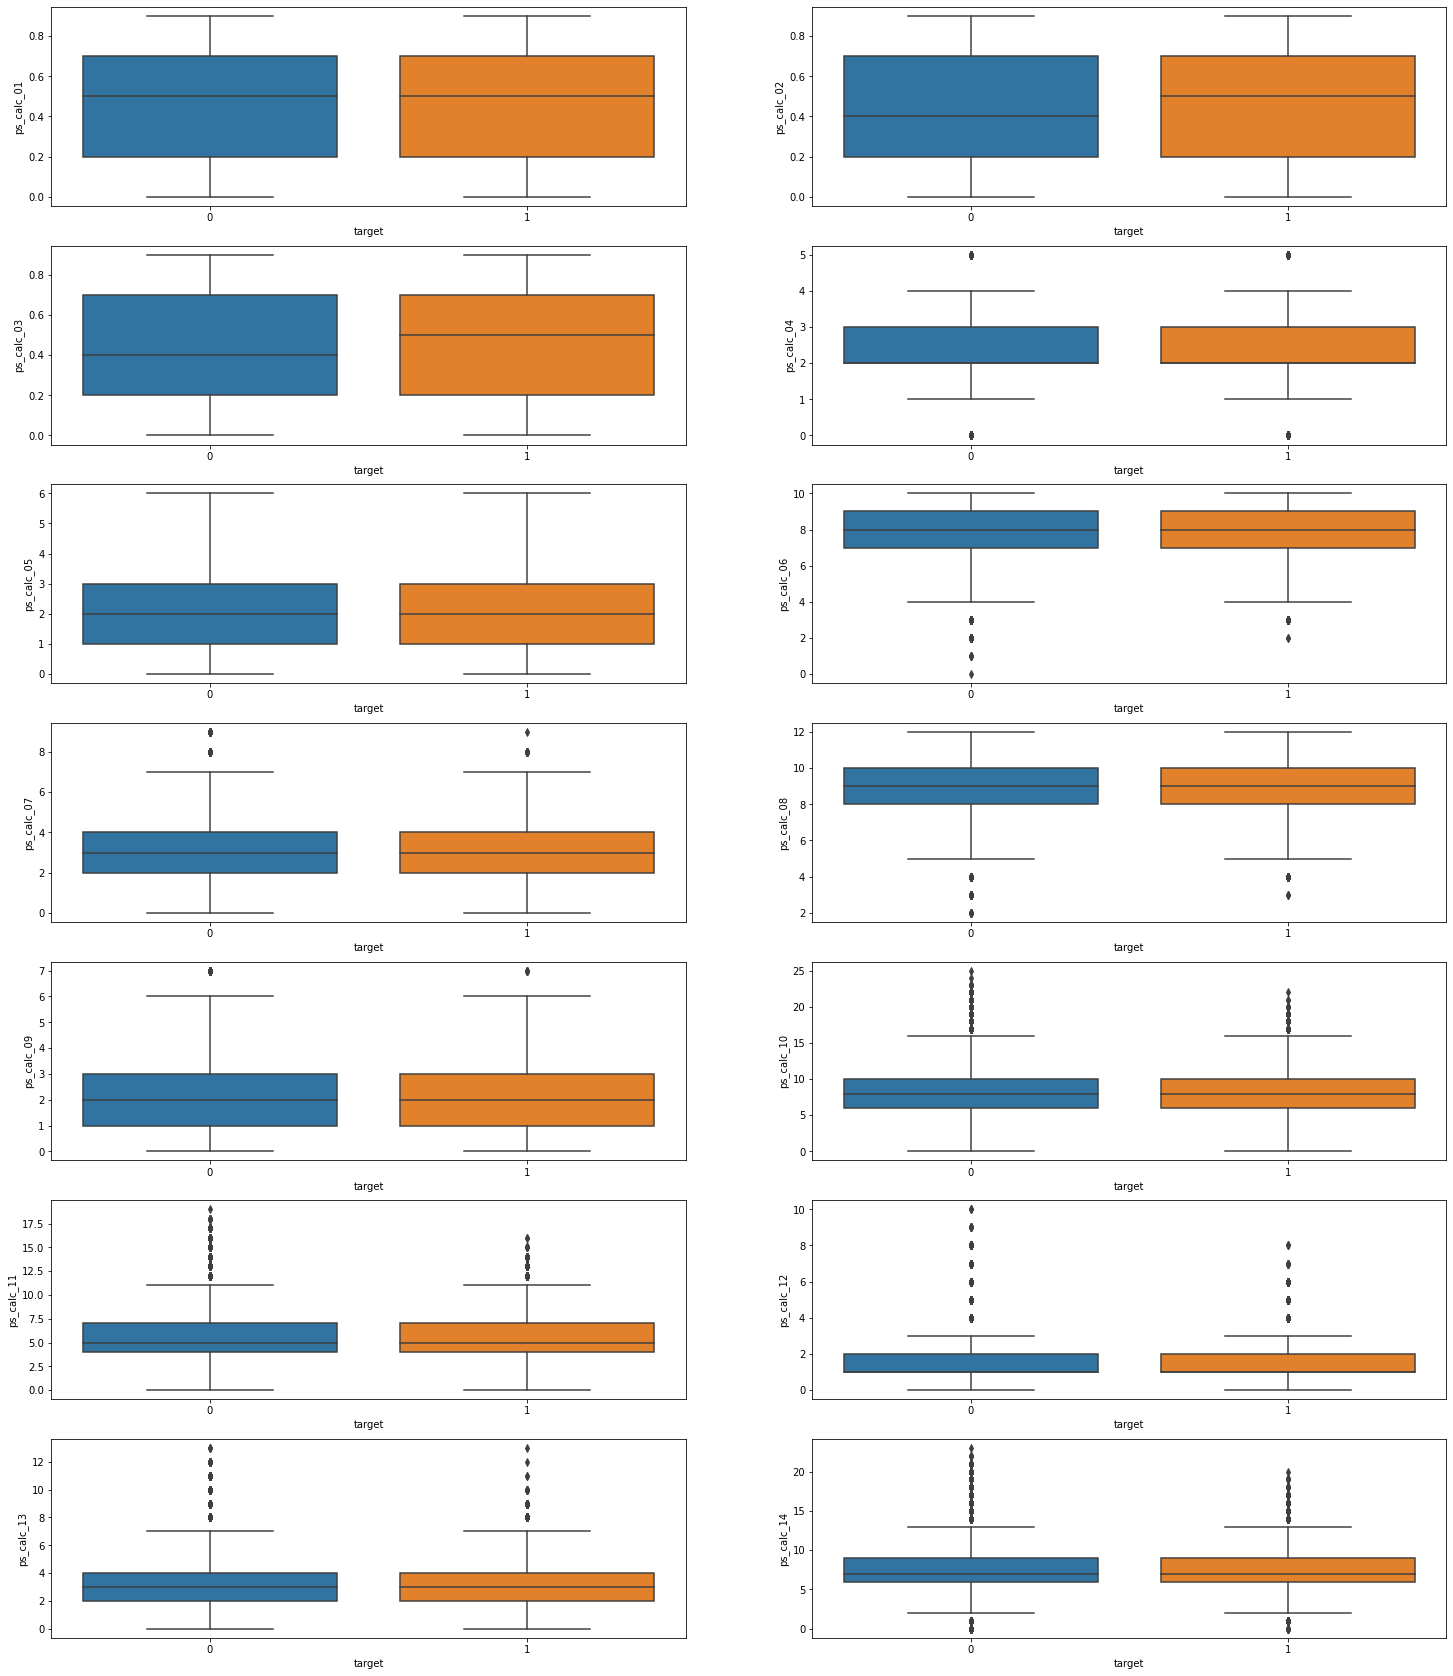

In [57]:
fig, ax = plt.subplots(7, 2)
fig.set_size_inches(25,30)
Col_Count = 0
       
for i in range(0,7):
    for j in range(0,2):
        sn.boxplot(x=x['target'],y=x[ps_calc[Col_Count]], ax=ax[i,j])
        Col_Count+=1

- Here we have plotted the boxplots for calculated features,in this as the interquartile range (IQR) and percentiles are overlapping so No inferences cannot be drawn from the above boxplot.


### Calculate VIF

In [58]:
Corr_Coeff= np.corrcoef(x, rowvar=False)
VIF = np.linalg.inv(Corr_Coeff)
VIF.diagonal()

array([ 1.00010823e+00,  1.00707020e+00,  1.33497129e+00,  1.06599734e+00,
        1.13928577e+00,  1.27660608e+00,  1.00538101e+00, -1.23837332e+15,
       -9.70474733e+14, -7.13438421e+14, -7.87325451e+14,  3.94592399e+12,
        2.00448472e+13,  1.10335014e+14,  1.09357810e+13,  1.90965050e+14,
        1.38710936e+00,  3.84572620e+00,  2.60789660e+00,  3.20849150e+00,
        1.39937911e+00,  2.65112448e+00,  2.37882930e+00,  1.23286521e+00,
        1.47018206e+00,  1.38800728e+00,  1.92805244e+00,  1.13582026e+00,
        1.12611187e+00,  1.04126950e+00,  1.48520345e+00,  1.23902787e+00,
        1.01016054e+00,  1.02224569e+00,  1.10411883e+00,  3.07869803e+00,
        5.78089258e+00,  2.32225098e+00,  2.33192776e+00,  1.00008349e+00,
        1.00009280e+00,  1.00012152e+00,  1.00008625e+00,  1.00006787e+00,
        1.00008921e+00,  1.00008204e+00,  1.00013070e+00,  1.00007502e+00,
        1.00007567e+00,  1.00009288e+00,  1.00011947e+00,  1.00012222e+00,
        1.00007437e+00,  

### Correlation Matrix

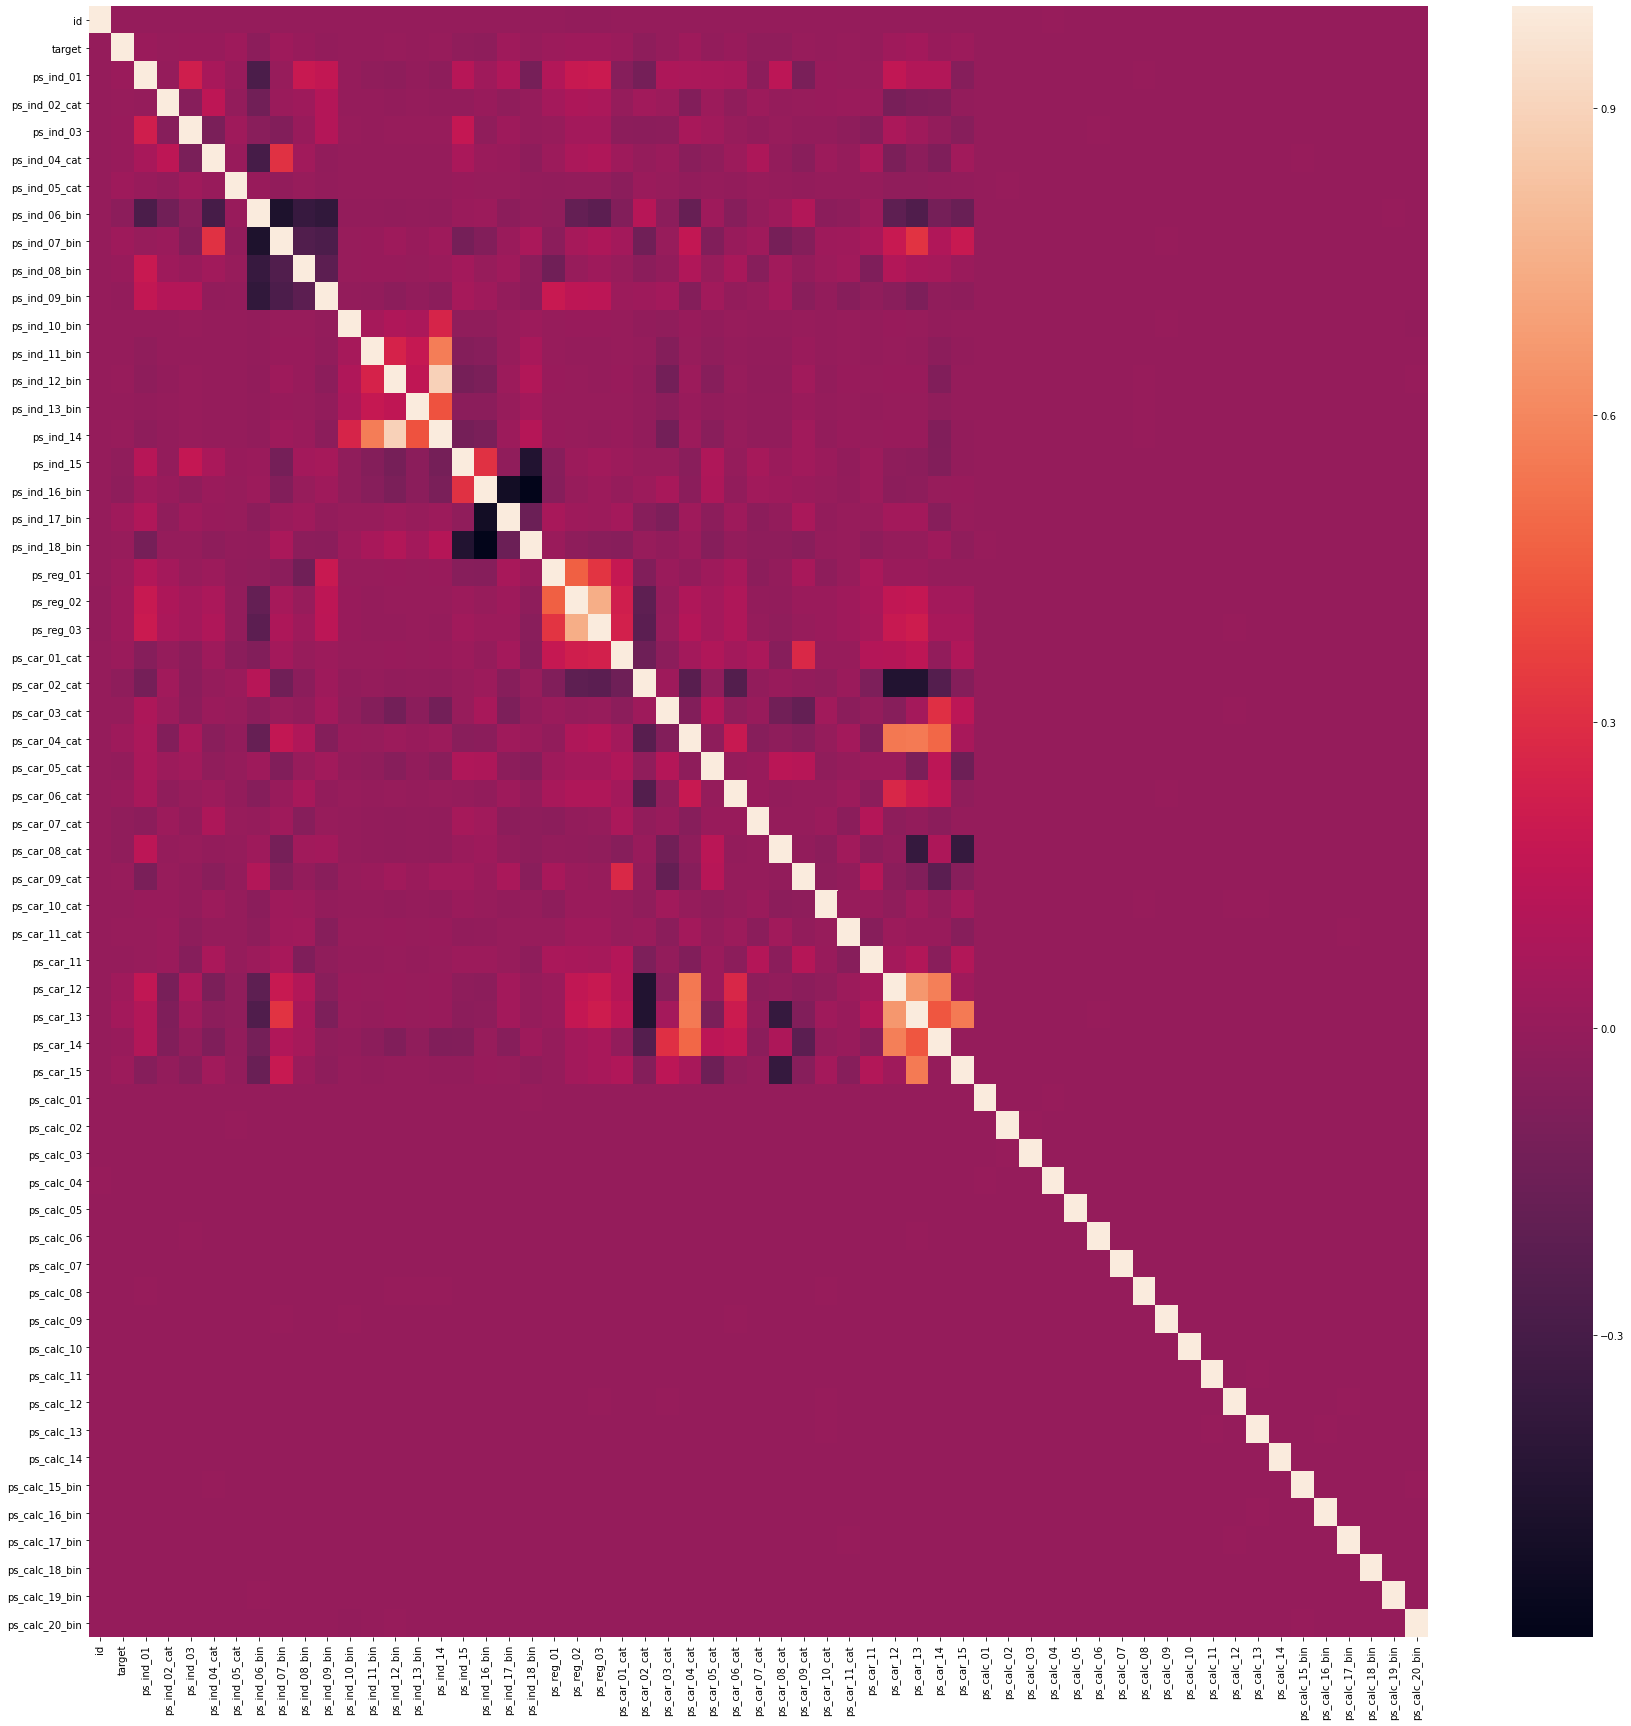

In [59]:
plt.figure(figsize=(30,30))
sn.heatmap(x.corr())
plt.show()

- There are some features that show negative correlation, Not highly correlated,Positive correlation is also very rare and weak and Most of the features are independent features


### Observations:

- The Dataset is Highly Imbalanced. i.e 96.36 : 3.64
- We have plotted count plots for Independent Binary Features in most of the plots the count for the target 0 is high and only in one case ps_ind_16_bin the count for the target 1 is high.
- For the Distribution of Binary Features With Respect To Target Column Some Features like ps_ind_bin_10, ps_ind_bin_11, ps_ind_bin_13 do have only 1 binary value here we have found No Inferences can be drawn out from these plots and One of the reason may even be the Imabalced Data.
- For the  count plot for the Calculated Binary feature The Distribution of these features is also imbalanced. Most of the features do have dominant value.
- For the Distribution of Calculated Binary Features With Respect To Target Column The probability of the Client Not Claiming the Insurance Policy is Relatively High, if ps_calc_15_bin is 1 and it is not possible to draw the exact inferences as the dataset is Highly Imbalanced and the Dataset is Generated Random Data.
- For the count plot for Independent Categorical feature as the Dataset is uneven distribution of the Categorical Features.ps_ind_02_cat the dominant category is 1 and ps_ind_05_cat the dominant category is 0.
- For the Distribution of Independent Categorical Features With Respect To Target Column and No Inferences can be drawn out.
- For the count plots and we observed that ps_car_11_cat has higher number of Categorical Values and All the Categorical columns are not evenly distributed.
- For the Distribution of Car Categorical Features With Respect To Target Column and we have no inferences from the plot
- For the Count plot for the Independent features and in this ps_ind_01 and ps_ind_14 are highly imbalanced and ps_ind_03 and ps_ind_15 is somewhat balanced and no inferences can be found from the above plots
- Distribution of Independent Categorical Features With Respect To Target Column as this dataset is highly imbalanced dataset we cannot find any inferences from the above plots.
- For the count plots for the region wise we have 3 regions in the dataset and in ps_reg_03 there are 5004 unique values in it and we observe no inferences from the above plots
- For the Distribution of Independent Categorical Features With Respect To Target Column and we found no inferences from the above plots
- In ps_calc_05, In ps_calc_06, In ps_calc_07, In ps_calc_08, In ps_calc_09, In ps_calc_10, In ps_calc_11, In ps_calc_12, In ps_calc_13, In ps_calc_14 in all these calculated features most of the data points are concentrated at different levels and the calculated features are randomly generated datapoints in the data
- Distribution of Calculated Features With Respect To Target Column These Features are mentioned as continous, but most of them do have very fewer values, Some Features from the above can be treated as Discrete Features,Even these features are unevenly distributed and finally No Useful Inferences can be drawn out.
- For the boxplots for calculated features,in this as the interquartile range (IQR) and percentiles are overlapping so No inferences cannot be drawn from the above boxplot.
- Finally in the correlation part There are some features that show negative correlation, Not highly correlated,Positive correlation is also very rare and weak and Most of the features are independent features


### Feature Engineering 

- Dropping all the 'calc' features
- We are dropping these features as they do not show any significant impact on the target variables.
- All the calculated features are randomly generated in the dataset 

In [17]:
x = x.iloc[:, :-20]
x.drop('id',axis=1,inplace=True)
x.head(5)

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15
0,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551
1,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490
2,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625
3,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000
4,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000


In [18]:
ps_ind=['ps_ind_01','ps_ind_03','ps_ind_14', 'ps_ind_15']
ps_ind_cat=['ps_ind_02_cat','ps_ind_04_cat', 'ps_ind_05_cat']
ps_ind_bin=['ps_ind_06_bin','ps_ind_06_bin', 'ps_ind_07_bin','ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin','ps_ind_12_bin', 'ps_ind_13_bin','ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin']
ps_reg=['ps_reg_01','ps_reg_02', 'ps_reg_03']
ps_car_cat=['ps_car_01_cat', 'ps_car_02_cat','ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat','ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat','ps_car_11_cat']
ps_car=['ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14','ps_car_15']

- Summing all Individual Binary Features and creating a new feature

In [19]:
x["ps_ind_bin_sum"]=x['ps_ind_06_bin']+x['ps_ind_06_bin']+x['ps_ind_07_bin']+x['ps_ind_08_bin']+x['ps_ind_09_bin']+x['ps_ind_10_bin']+x['ps_ind_11_bin']+x['ps_ind_12_bin']+x['ps_ind_13_bin']+x['ps_ind_16_bin']+x['ps_ind_17_bin']+x['ps_ind_18_bin']

- Summing all regions and creating a new feature

In [20]:
x["ps_reg_sum"]=(x['ps_reg_01']+x['ps_reg_02']+x['ps_reg_03'])/3

#### Observing Correlation of the Features i.e. Including Feature Engineered

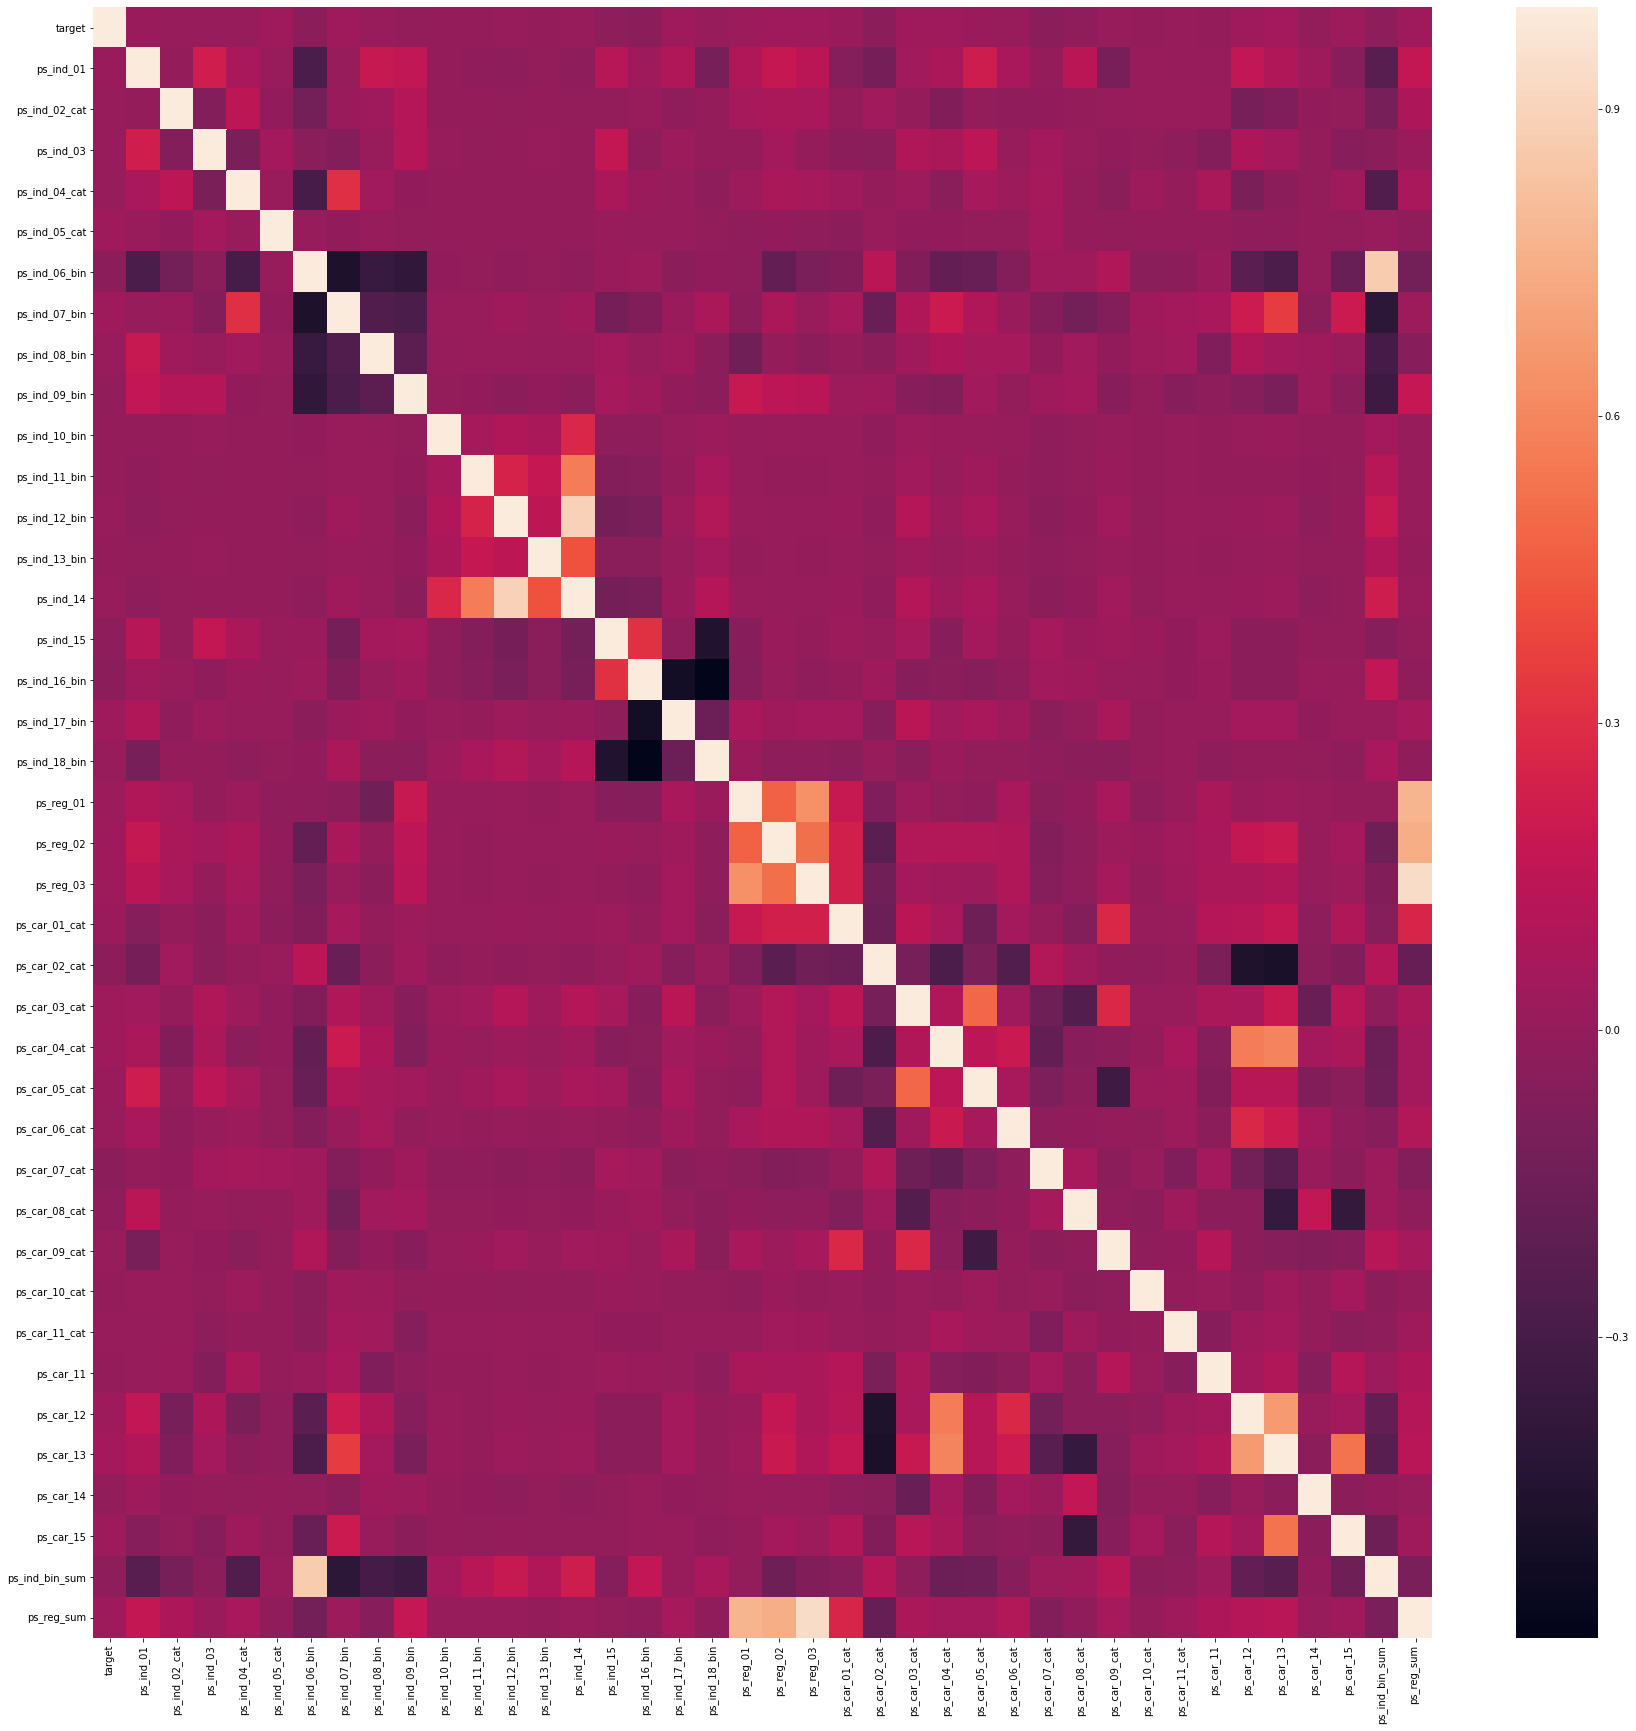

In [21]:
plt.figure(figsize=(30,30))
sn.heatmap(x.corr())
plt.show()

### Conclusion  

- For the Feature Engineering we have removed all the calculated features as they are randomly generated in the dataset because they won't show any significant impact on the target and for the Individual binary features we have add all the binary features and added a new column and for the regions we taken the average of the regions 

### Splitting The Data

In [22]:
from sklearn.model_selection import train_test_split

x= pd.read_csv("Final_Data.csv")
x=x.drop('Unnamed: 0',axis=1)
i=x.drop('target',axis=1)
c=x['target']

X_train, X_test, Y_train, Y_test=train_test_split(i,c,test_size=0.1)

In [81]:
print('shape of X_train',X_train.shape)
print('shape of X_test',X_test.shape)
print('shape of Y_train',Y_train.shape)
print('shape of Y_test',Y_test.shape)

shape of X_train (535690, 39)
shape of X_test (59522, 39)
shape of Y_train (535690,)
shape of Y_test (59522,)


### Vectorizing the Data

#### Standardizing Data

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
Numerical_features=['ps_ind_01','ps_ind_03','ps_ind_15','ps_reg_01','ps_reg_02','ps_reg_03','ps_car_12','ps_car_13','ps_car_14','ps_car_15','ps_ind_bin_sum','ps_reg_sum']

In [26]:
scaler = StandardScaler()
scaler.fit(X_train[Numerical_features])
X_train[Numerical_features] = scaler.transform(X_train[Numerical_features])
X_test[Numerical_features] = scaler.transform(X_test[Numerical_features])

### Preparing the Test Data

In [27]:
test=pd.read_csv("test.csv")
test_id=test['id']

In [28]:
test.head(2)

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1,8,1,0,0,1,0,0,0,0,0,0,0,12,1,0,0,0.5,0.3,0.610328,7,1,-1,0,-1,1,1,1,2,1,65,1,0.316228,0.669556,0.352136,3.464102,0.1,0.8,0.6,1,1,6,3,6,2,9,1,1,1,12,0,1,1,0,0,1
1,1,4,2,5,1,0,0,0,0,1,0,0,0,0,0,5,1,0,0,0.9,0.5,0.771362,4,1,-1,0,0,11,1,1,0,1,103,1,0.316228,0.606320,0.358329,2.828427,0.4,0.5,0.4,3,3,8,4,10,2,7,2,0,3,10,0,0,1,1,0,1


In [29]:
test = test.iloc[:, :-20]
print(test.shape)

(892816, 38)


In [30]:
test.drop('id',axis=1,inplace=True)

In [31]:
ps_ind=['ps_ind_01','ps_ind_03','ps_ind_14', 'ps_ind_15']
ps_ind_cat=['ps_ind_02_cat','ps_ind_04_cat', 'ps_ind_05_cat']
ps_ind_bin=['ps_ind_06_bin','ps_ind_06_bin', 'ps_ind_07_bin','ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin','ps_ind_12_bin', 'ps_ind_13_bin','ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin']
ps_reg=['ps_reg_01','ps_reg_02', 'ps_reg_03']
ps_car_cat=['ps_car_01_cat', 'ps_car_02_cat','ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat','ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat','ps_car_11_cat']
ps_car=['ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14','ps_car_15']

- Summing all Individual Binary Features and creating a new feature

In [32]:
test["ps_ind_bin_sum"]=test['ps_ind_06_bin']+test['ps_ind_06_bin']+test['ps_ind_07_bin']+test['ps_ind_08_bin']+test['ps_ind_09_bin']+test['ps_ind_10_bin']+test['ps_ind_11_bin']+test['ps_ind_12_bin']+test['ps_ind_13_bin']+test['ps_ind_16_bin']+test['ps_ind_17_bin']+test['ps_ind_18_bin']

- Summing all regions and creating a new feature

In [33]:
test["ps_reg_sum"]=(test['ps_reg_01']+test['ps_reg_02']+test['ps_reg_03'])/3

In [34]:
test.shape

(892816, 39)

In [35]:
test[Numerical_features] = scaler.transform(test[Numerical_features])

#### Function for Calculating Normalized Gini Coefficient.

In [36]:
# Referred :  https://www.kaggle.com/c/ClaimPredictionChallenge/discussion/703

def Gini_Coeff(Y_True, Y_Pred, cmpcol = 0, sortcol = 1):  
    
    assert( len(Y_True) == len(Y_Pred) )  
    Np_ar = np.asarray(np.c_[ Y_True, Y_Pred, np.arange(len(Y_True)) ], dtype=np.float)  
    Np_ar = Np_ar[ np.lexsort((Np_ar[:,2], -1*Np_ar[:,1])) ]  
    totalLosses = Np_ar[:,0].sum()  
    giniSum = Np_ar[:,0].cumsum().sum() / totalLosses  
    giniSum -= (len(Y_True) + 1) / 2  
    return giniSum / len(Y_True)  
  
def Gini(a, p):  
    
    return Gini_Coeff(a, p) / Gini_Coeff(a, a) 

### Baseline Modelling  

### KNN

In [79]:
from sklearn.neighbors import KNeighborsClassifier
from tqdm.notebook import tqdm

K=[3,5,7,9,11,13]
Train_score=[]
Test_score=[]

for i in tqdm(K):
    KNN=KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train,Y_train)
    Train_pred=KNN.predict_proba(X_train)[:,1]
    Test_pred=KNN.predict_proba(X_test)[:,1]
    
    Train_score.append( Gini (Y_train,Train_pred))
    Test_score.append( Gini (Y_test,Test_pred))
    
    print("{} KNeighborsClassifier : Gini Score : {}".format(i, Gini (Y_test,Test_pred)))

3 KNeighborsClassifier : Gini Score : 0.028044878570003744
5 KNeighborsClassifier : Gini Score : 0.036996517398861166
7 KNeighborsClassifier : Gini Score : 0.039178488606013466
9 KNeighborsClassifier : Gini Score : 0.04791691654356807
11 KNeighborsClassifier : Gini Score : 0.03995439879208677
13 KNeighborsClassifier : Gini Score : 0.041757705368540635



### Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression


C=[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
Train_score=[]
Test_score=[]

for i in tqdm(C):
    
    LR=LogisticRegression(C=i,max_iter=10000)
    LR.fit(X_train,Y_train)
    Train_pred=LR.predict_proba(X_train)[:,1]
    Test_pred=LR.predict_proba(X_test)[:,1]
    
    Train_score.append( Gini (Y_train,Train_pred))
    Test_score.append( Gini (Y_test,Test_pred))
    
    print("{} LogisticRegression : gini_score : {}".format(i, Gini (Y_test,Test_pred)))

1e-05 LogisticRegression : gini_score : 0.20610582755210824
0.0001 LogisticRegression : gini_score : 0.22816703945081737
0.001 LogisticRegression : gini_score : 0.2367243033727753
0.01 LogisticRegression : gini_score : 0.23822109428354377
0.1 LogisticRegression : gini_score : 0.23855330660255064
1 LogisticRegression : gini_score : 0.23823556931100723
10 LogisticRegression : gini_score : 0.23835751097866462
100 LogisticRegression : gini_score : 0.2382832220756974
1000 LogisticRegression : gini_score : 0.23825627277576855
10000 LogisticRegression : gini_score : 0.23816302019499475



### Logistic Regression using SGDClassifier

In [81]:
from sklearn.linear_model import SGDClassifier


alpha=[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
Train_score=[]
Test_score=[]

for i in tqdm(alpha):
    
    SGDLR=SGDClassifier(alpha=i,max_iter=1000,loss='log',penalty='l1')
    SGDLR.fit(X_train,Y_train)
    Train_pred=SGDLR.predict_proba(X_train)[:,1]
    Test_pred=SGDLR.predict_proba(X_test)[:,1]
    
    Train_score.append( Gini (Y_train,Train_pred))
    Test_score.append( Gini (Y_test,Test_pred))
    
    print("{} SGDClassifier : gini_score : {}".format(i, Gini (Y_test,Test_pred)))

1e-05 SGDClassifier : gini_score : 0.2229712353019753
0.0001 SGDClassifier : gini_score : 0.22617741908938077
0.001 SGDClassifier : gini_score : 0.21612336425665463
0.01 SGDClassifier : gini_score : -0.053239638150758245
0.1 SGDClassifier : gini_score : -0.025895493572513705
1 SGDClassifier : gini_score : -0.025895493572513705
10 SGDClassifier : gini_score : -0.025895493572513705
100 SGDClassifier : gini_score : -0.0005402908387934231
1000 SGDClassifier : gini_score : -0.0005402908387934231
10000 SGDClassifier : gini_score : -0.0005402908387934231



### Logistic Regression using SGDClassifier

In [86]:
from sklearn.linear_model import SGDClassifier


alpha=[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
Train_score=[]
Test_score=[]

for i in tqdm(alpha):
    
    SGDLR=SGDClassifier(alpha=i,max_iter=1000,loss='log',penalty='l2')
    SGDLR.fit(X_train,Y_train)
    Train_pred=SGDLR.predict_proba(X_train)[:,1]
    Test_pred=SGDLR.predict_proba(X_test)[:,1]
    
    Train_score.append( Gini (Y_train,Train_pred))
    Test_score.append( Gini (Y_test,Test_pred))
    
    print("{} SGDClassifier : gini_score : {}".format(i, Gini (Y_test,Test_pred)))

1e-05 SGDClassifier : gini_score : 0.09281754704583997
0.0001 SGDClassifier : gini_score : 0.17747391006783747
0.001 SGDClassifier : gini_score : 0.09132028639259387
0.01 SGDClassifier : gini_score : 0.21403490659831947
0.1 SGDClassifier : gini_score : 0.0631517263679779
1 SGDClassifier : gini_score : -0.03292473740786561
10 SGDClassifier : gini_score : -0.029030746245774567
100 SGDClassifier : gini_score : -0.025733049664550003
1000 SGDClassifier : gini_score : -0.026465830532015375
10000 SGDClassifier : gini_score : -0.026747867395247732



### Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm

max_depth = [3,5,7,9]
min_samples_leaf = [1000,100,10,70,50]
Train_Score = []
Test_Score = []

for i in tqdm(max_depth):
    for j in min_samples_leaf:
        rf = RandomForestClassifier(max_depth=i, min_samples_leaf=j, n_jobs=-1)
        rf.fit(X_train, Y_train)
        
        Train_pred= (rf.predict_proba(X_train)[:,1])
        Test_pred= (rf.predict_proba(X_test)[:,1])
        
        Train_Score.append(Gini(Y_train, Train_pred))
        Test_Score.append(Gini(Y_test,Test_pred))
        
        print("max_depth : {}, min_samples_leaf : {} Score : {}".format(i, j, Gini (Y_test,Test_pred)))

  0%|                                                              | 0/4 [00:00<?, ?it/s]

max_depth : 3, min_samples_leaf : 1000 Score : 0.2463113079436443
max_depth : 3, min_samples_leaf : 100 Score : 0.24747750460124285
max_depth : 3, min_samples_leaf : 10 Score : 0.24618033233784223
max_depth : 3, min_samples_leaf : 70 Score : 0.2451609061179146
max_depth : 3, min_samples_leaf : 50 Score : 0.24754873755727408


 25%|█████████████▌                                        | 1/4 [00:42<02:08, 42.99s/it]

max_depth : 5, min_samples_leaf : 1000 Score : 0.25705819833178123
max_depth : 5, min_samples_leaf : 100 Score : 0.2576613699826197
max_depth : 5, min_samples_leaf : 10 Score : 0.25696650152215317
max_depth : 5, min_samples_leaf : 70 Score : 0.25808102651549575
max_depth : 5, min_samples_leaf : 50 Score : 0.25763917043321327


 50%|███████████████████████████                           | 2/4 [01:44<01:37, 48.66s/it]

max_depth : 7, min_samples_leaf : 1000 Score : 0.2655435465076741
max_depth : 7, min_samples_leaf : 100 Score : 0.2628777780983028
max_depth : 7, min_samples_leaf : 10 Score : 0.26580685156201
max_depth : 7, min_samples_leaf : 70 Score : 0.26539517922985856
max_depth : 7, min_samples_leaf : 50 Score : 0.2649948930622191


 75%|████████████████████████████████████████▌             | 3/4 [03:04<00:57, 57.86s/it]

max_depth : 9, min_samples_leaf : 1000 Score : 0.26652051760809603
max_depth : 9, min_samples_leaf : 100 Score : 0.2692896640598946
max_depth : 9, min_samples_leaf : 10 Score : 0.26924226220733083
max_depth : 9, min_samples_leaf : 70 Score : 0.27053318596581616
max_depth : 9, min_samples_leaf : 50 Score : 0.2708446392219139


100%|██████████████████████████████████████████████████████| 4/4 [04:39<00:00, 69.87s/it]


<h5> Tuning n_estimators

In [28]:
n_estimators = [1000,100,10,70,50]
for i in tqdm(n_estimators):
    rf = RandomForestClassifier(max_depth=9 ,n_estimators=i, min_samples_leaf=70, n_jobs=-1)
    rf.fit(X_train, Y_train)
        
    Train_pred= (rf.predict_proba(X_train)[:,1])
    Test_pred= (rf.predict_proba(X_test)[:,1])
        
    Train_Score.append(Gini(Y_train, Train_pred))
    Test_Score.append(Gini(Y_test,Test_pred))

    print("n_estimators:{}, Score : {}".format(i,Gini (Y_test,Test_pred)))


  0%|                                                              | 0/5 [00:00<?, ?it/s]

n_estimators:1000, Score : 0.27209737767258546


 20%|██████████▌                                          | 1/5 [03:03<12:13, 183.29s/it]

n_estimators:100, Score : 0.26983363112666336


 40%|█████████████████████▏                               | 2/5 [03:22<06:42, 134.04s/it]

n_estimators:10, Score : 0.2524549768317589


 60%|████████████████████████████████▍                     | 3/5 [03:25<03:09, 94.64s/it]

n_estimators:70, Score : 0.2677280238259657


 80%|███████████████████████████████████████████▏          | 4/5 [03:38<01:10, 70.33s/it]

n_estimators:50, Score : 0.2677631543091548


100%|██████████████████████████████████████████████████████| 5/5 [03:49<00:00, 45.81s/it]


#### Testing The Performance of Best Model

In [29]:
rf = RandomForestClassifier(max_depth= 9 ,n_estimators=1000, min_samples_leaf=70, n_jobs=-1)
rf.fit(X_train, Y_train)
Test_pred= (rf.predict_proba(X_test)[:,1])
print((Gini(Y_test, Test_pred)))

0.27125514863787287


In [30]:
Feat_Imp = rf.feature_importances_
col_names=list(X_train.columns)
scores=[]
for ind,imp_val in enumerate(Feat_Imp):
    scores.append(imp_val)

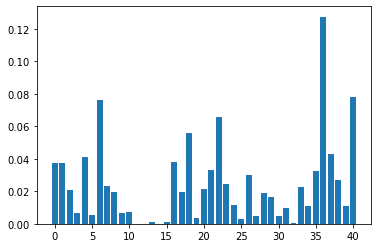

In [31]:
plt.bar([x for x in range(len(Feat_Imp))], Feat_Imp)
plt.show()

In [55]:
Score_Ind = np.argsort(scores)
Score_Ind = Score_Ind[::-1]

In [60]:
print("Top 8 Features: ")
print("\n")
for i in Score_Ind[0:8]:
    
    print("Feature : {} || Score : {}".format(col_names[i],scores[i]))

Top 8 Features: 


Feature : ps_car_13 || Score : 0.12750352342500224
Feature : ps_reg_sum || Score : 0.07823055201435264
Feature : ps_ind_05_cat || Score : 0.07623864756354025
Feature : ps_reg_03 || Score : 0.06601837974998587
Feature : ps_ind_17_bin || Score : 0.05604692727589425
Feature : ps_car_14 || Score : 0.04317397873137039
Feature : ps_ind_03 || Score : 0.04087154712282065
Feature : ps_ind_15 || Score : 0.03824632055770425


#### Predicting on Test Data

In [88]:
TEST_PRED=rf.predict_proba(test)[:,1]
submission = pd.DataFrame()
submission['id'] = test_id
submission['target'] = TEST_PRED
submission.to_csv('randomforest_FE_submission.csv', index = False)

### Decision Tree Classifier

In [132]:
from sklearn.tree import DecisionTreeClassifier
min_samples_leaf = [5,10,20,30,45,120]
max_depth = [3,5,7,9]
Train_Score = []
Test_Score = []
for i in tqdm(max_depth):
    for j in min_samples_leaf:
        DTClassifier = DecisionTreeClassifier(max_depth=i, min_samples_leaf=j)
        DTClassifier.fit(X_train, Y_train)
        
        Train_pred= (DTClassifier.predict_proba(X_train)[:,1])
        Test_pred= (DTClassifier.predict_proba(X_test)[:,1])
        
        Train_Score.append(Gini(Y_train, Train_pred))
        Test_Score.append(Gini(Y_test,Test_pred))
        
        print("max_depth : {}, min_samples_leaf : {} Score : {}".format(i, j, Gini (Y_test,Test_pred)))

max_depth : 3, min_samples_leaf : 5 Score : 0.18454636243800374
max_depth : 3, min_samples_leaf : 10 Score : 0.18454636243800374
max_depth : 3, min_samples_leaf : 20 Score : 0.18454636243800374
max_depth : 3, min_samples_leaf : 30 Score : 0.18547908628642887
max_depth : 3, min_samples_leaf : 45 Score : 0.18547908628642887
max_depth : 3, min_samples_leaf : 120 Score : 0.18547908628642887
max_depth : 5, min_samples_leaf : 5 Score : 0.2156219363187818
max_depth : 5, min_samples_leaf : 10 Score : 0.21564035252504327
max_depth : 5, min_samples_leaf : 20 Score : 0.21645874175726249
max_depth : 5, min_samples_leaf : 30 Score : 0.21918435633994363
max_depth : 5, min_samples_leaf : 45 Score : 0.21918435633994363
max_depth : 5, min_samples_leaf : 120 Score : 0.21952003866279393
max_depth : 7, min_samples_leaf : 5 Score : 0.23839947593289232
max_depth : 7, min_samples_leaf : 10 Score : 0.24031095611740766
max_depth : 7, min_samples_leaf : 20 Score : 0.24110991761677908
max_depth : 7, min_samples_

In [133]:
DTClassifier = DecisionTreeClassifier(max_depth=7, min_samples_leaf=20)
DTClassifier.fit(X_train, Y_train)
Test_pred= (DTClassifier.predict_proba(X_test)[:,1])
print((Gini(Y_test, Test_pred)))       

0.2411606545058692


### Predicting on Test Data

In [91]:
TEST_PRED=DTClassifier.predict_proba(test)[:,1]
submission = pd.DataFrame()
submission['id'] = test_id
submission['target'] = TEST_PRED
submission.to_csv('DecisonTree_FE_submission.csv', index = False)

### Adaboost Classifier

In [92]:
from sklearn.ensemble import AdaBoostClassifier
n_estimators = [1000,100,10,70,50]
for i in tqdm(n_estimators):
        ADAClassifier = AdaBoostClassifier(n_estimators=i)
        ADAClassifier.fit(X_train, Y_train)
        
        Train_pred= (ADAClassifier.predict_proba(X_train)[:,1])
        Test_pred= (ADAClassifier.predict_proba(X_test)[:,1])
        
        Train_Score.append(Gini(Y_train, Train_pred))
        Test_Score.append(Gini(Y_test,Test_pred))
        
        print("n_estimators : {},  Score : {}".format(i,Gini (Y_test,Test_pred)))

n_estimators : 1000,  Score : 0.26390160238206056
n_estimators : 100,  Score : 0.2660216893672329
n_estimators : 10,  Score : 0.23007704716120536
n_estimators : 70,  Score : 0.2623148296899932
n_estimators : 50,  Score : 0.2609688435124614



#### Testing the Best Model Performance

In [93]:
ADAClassifier = AdaBoostClassifier(n_estimators=100)
ADAClassifier.fit(X_train, Y_train)
Test_pred= (ADAClassifier.predict_proba(X_test)[:,1])
print((Gini(Y_test, Test_pred)))

0.2660216893672329


#### Predicting on Test Data

In [94]:
TEST_PRED=ADAClassifier.predict_proba(test)[:,1]
submission = pd.DataFrame()
submission['id'] = test_id
submission['target'] = TEST_PRED
submission.to_csv('Adaboost_FE_submission.csv', index = False)

#### XG Boost 

In [95]:
import xgboost as xgb
from tqdm.notebook import tqdm

n_estimators = [1000,100,10,70,50]
learning_rate = [0.01,0.1,0.3]
Train_Score = []
Test_Score = []

for i in tqdm(n_estimators):
    for j in learning_rate:
        xgb_model = xgb.XGBClassifier(n_estimators = i, learning_rate=j,n_jobs =-1)
        xgb_model.fit(X_train, Y_train)
        
        Train_pred=xgb_model.predict_proba(X_train)[:,1]
        Test_pred=xgb_model.predict_proba(X_test)[:,1]
        Train_score.append( Gini(Y_train,Train_pred))
        Test_score.append( Gini(Y_test,Test_pred))

        print("n_estimators : {} learning rate : {}  Score : {}".format(i, j, Gini (Y_test,Test_pred)))
        
    

n_estimators : 1000 learning rate : 0.01  Score : 0.2777326824999109
n_estimators : 1000 learning rate : 0.1  Score : 0.21878228065957842
n_estimators : 1000 learning rate : 0.3  Score : 0.1274406296831803
n_estimators : 100 learning rate : 0.01  Score : 0.2391462433945944
n_estimators : 100 learning rate : 0.1  Score : 0.27242674983683407
n_estimators : 100 learning rate : 0.3  Score : 0.23821190820842264
n_estimators : 10 learning rate : 0.01  Score : 0.23014023622340124
n_estimators : 10 learning rate : 0.1  Score : 0.23713628492365685
n_estimators : 10 learning rate : 0.3  Score : 0.25334450554924176
n_estimators : 70 learning rate : 0.01  Score : 0.23692364816204894
n_estimators : 70 learning rate : 0.1  Score : 0.2744920161350625
n_estimators : 70 learning rate : 0.3  Score : 0.2552374633474733
n_estimators : 50 learning rate : 0.01  Score : 0.23461401138815816
n_estimators : 50 learning rate : 0.1  Score : 0.27013825147444337
n_estimators : 50 learning rate : 0.3  Score : 0.2643

#### Fine Tuning the Model

In [96]:
max_depth = [3,5,7,9]
subsample = [0.70,0.8,0.9]
Train_score = []
Test_score = []

for i in tqdm(max_depth):
    for j in subsample:
        xgb_model = xgb.XGBClassifier(max_depth=i,subsample=j,n_estimators = 1000, learning_rate=0.01,n_jobs =-1)
        xgb_model.fit(X_train, Y_train)
        Train_pred=xgb_model.predict_proba(X_train)[:,1]
        Test_pred=xgb_model.predict_proba(X_test)[:,1]
        
        Train_score.append(Gini(Y_train,Train_pred))
        Test_score.append(Gini(Y_test,Test_pred))

        print("max depth : {} subsample : {} Score : {}".format(i, j, Gini(Y_test,Test_pred)))

max depth : 3 subsample : 0.7 Score : 0.2728611920373013
max depth : 3 subsample : 0.8 Score : 0.2713400963027751
max depth : 3 subsample : 0.9 Score : 0.27138399112764316
max depth : 5 subsample : 0.7 Score : 0.2797604737871346
max depth : 5 subsample : 0.8 Score : 0.2812665029666324
max depth : 5 subsample : 0.9 Score : 0.28011293722629454
max depth : 7 subsample : 0.7 Score : 0.281467048208905
max depth : 7 subsample : 0.8 Score : 0.2802828622181637
max depth : 7 subsample : 0.9 Score : 0.27885463631128155
max depth : 9 subsample : 0.7 Score : 0.2722613308931778
max depth : 9 subsample : 0.8 Score : 0.273519701399669
max depth : 9 subsample : 0.9 Score : 0.2717679969042927



In [99]:
min_child_weight = [29,53,98,99,100,101]
Train_score = []
Test_score = []

for i in tqdm(min_child_weight):
    xgb_model = xgb.XGBClassifier(min_child_weight=i,max_depth=7,subsample=0.7,n_estimators = 1000, learning_rate=0.01,n_jobs =-1)
    xgb_model.fit(X_train, Y_train)
    
    Train_pred=xgb_model.predict_proba(X_train)[:,1]
    Test_pred=xgb_model.predict_proba(X_test)[:,1]
    
    Train_score.append( Gini(Y_train,Train_pred))
    Test_score.append( Gini(Y_test,Test_pred))
    
        
    print("min_child_weight : {}  Score : {}".format(i, Gini (Y_test,Test_pred)))

min_child_weight : 29  Score : 0.28124104988348464
min_child_weight : 53  Score : 0.28244437353072804
min_child_weight : 98  Score : 0.28379707528590525
min_child_weight : 99  Score : 0.2842062209840508
min_child_weight : 100  Score : 0.2839268981884676
min_child_weight : 101  Score : 0.2839384503738472



#### Testing the Best Model Performance

In [100]:
xgb_model = xgb.XGBClassifier(max_depth=7,subsample=0.7,n_estimators = 1000, learning_rate=0.01,min_child_weight=99,n_jobs =-1)
xgb_model.fit(X_train, Y_train)
Test_pred=xgb_model.predict_proba(X_test)[:,1]
print(Gini(Y_test,Test_pred))

0.2842062209840508


#### Predicting on Test Data

In [101]:
TEST_pred=xgb_model.predict_proba(test)[:,1]
submission = pd.DataFrame()
submission['id'] = test_id
submission['target'] = TEST_pred
submission.to_csv('xgboost_FE_submission.csv', index = False)

### Baseline Modelling  

### KNN

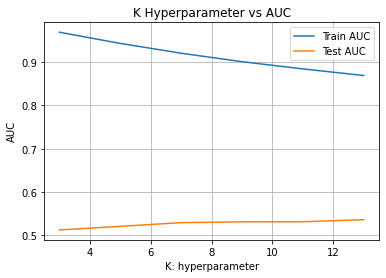

In [70]:
from sklearn.neighbors import KNeighborsClassifier
from tqdm.notebook import tqdm
from sklearn.metrics import roc_auc_score

K=[3,5,7,9,11,13]
Train_KNN_AUC_score=[]
Test_KNN_AUC_score=[]

for i in tqdm(K):
    KNN=KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train,Y_train)
    Train_pred=KNN.predict_proba(X_train)[:,1]
    Test_pred=KNN.predict_proba(X_test)[:,1]
    
    Train_KNN_AUC_score.append( roc_auc_score (Y_train,Train_pred))
    Test_KNN_AUC_score.append( roc_auc_score (Y_test,Test_pred))
    
   
    
plt.plot(K, Train_KNN_AUC_score, label='Train AUC')
plt.plot(K, Test_KNN_AUC_score, label='Test AUC')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("K Hyperparameter vs AUC")
plt.grid()
plt.show()

### Logistic Regression

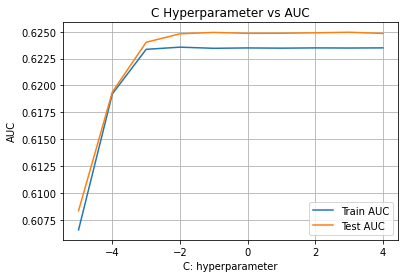

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

C=[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
Train_log_score=[]
Test_log_score=[]

for i in tqdm(C):
    
    LR=LogisticRegression(C=i,max_iter=10000)
    LR.fit(X_train,Y_train)
    Train_pred=LR.predict_proba(X_train)[:,1]
    Test_pred=LR.predict_proba(X_test)[:,1]
    
    Train_log_score.append( roc_auc_score (Y_train,Train_pred))
    Test_log_score.append( roc_auc_score (Y_test,Test_pred))
    
   
    
plt.plot(np.log10(C), Train_log_score, label='Train AUC')
plt.plot(np.log10(C), Test_log_score, label='Test AUC')

plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("C Hyperparameter vs AUC")
plt.grid()
plt.show()

### Logistic Regression using SGDClassifier

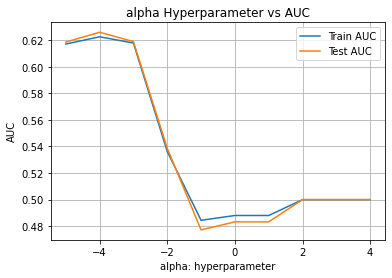

In [45]:
from sklearn.linear_model import SGDClassifier


alpha=[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
Train_SGD_score=[]
Test_SGD_score=[]

for i in tqdm(alpha):
    
    SGDLR=SGDClassifier(alpha=i,max_iter=1000,loss='log',penalty='l1')
    SGDLR.fit(X_train,Y_train)
    Train_pred=SGDLR.predict_proba(X_train)[:,1]
    Test_pred=SGDLR.predict_proba(X_test)[:,1]
    
    Train_SGD_score.append( roc_auc_score (Y_train,Train_pred))
    Test_SGD_score.append( roc_auc_score (Y_test,Test_pred))
    
    
    
plt.plot(np.log10(alpha), Train_SGD_score, label='Train AUC')
plt.plot(np.log10(alpha), Test_SGD_score, label='Test AUC')

plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("alpha Hyperparameter vs AUC")
plt.grid()
plt.show()

### Logistic Regression using SGDClassifier

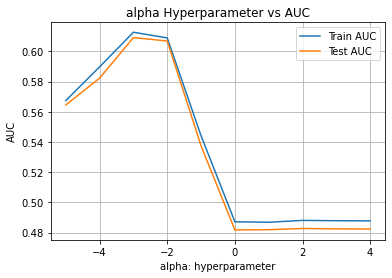

In [46]:
from sklearn.linear_model import SGDClassifier


alpha=[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
Train_Logsgd_score=[]
Test_Logsgd_score=[]

for i in tqdm(alpha):
    
    SGDLR=SGDClassifier(alpha=i,max_iter=1000,loss='log',penalty='l2')
    SGDLR.fit(X_train,Y_train)
    Train_pred=SGDLR.predict_proba(X_train)[:,1]
    Test_pred=SGDLR.predict_proba(X_test)[:,1]
    
    Train_Logsgd_score.append(  roc_auc_score (Y_train,Train_pred))
    Test_Logsgd_score.append(  roc_auc_score (Y_test,Test_pred))
    
plt.plot(np.log10(alpha), Train_Logsgd_score, label='Train AUC')
plt.plot(np.log10(alpha), Test_Logsgd_score, label='Test AUC')

plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("alpha Hyperparameter vs AUC")
plt.grid()
plt.show()

### Random Forest

100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [06:52<00:00, 103.04s/it]


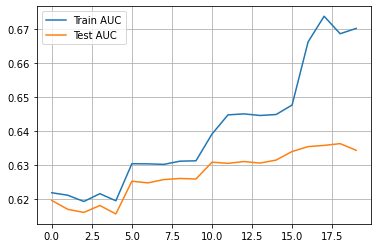

In [48]:
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm

max_depth = [3,5,7,9]
min_samples_leaf = [1000,100,10,70,50]
Train_RF_Score = []
Test_RF_Score = []

for i in tqdm(max_depth):
    for j in min_samples_leaf:
        rf = RandomForestClassifier(max_depth=i, min_samples_leaf=j, n_jobs=-1)
        rf.fit(X_train, Y_train)
        
        Train_pred= (rf.predict_proba(X_train)[:,1])
        Test_pred= (rf.predict_proba(X_test)[:,1])
        
        Train_RF_Score.append(roc_auc_score(Y_train, Train_pred))
        Test_RF_Score.append(roc_auc_score(Y_test,Test_pred))

plt.plot(Train_RF_Score, label='Train AUC')
plt.plot(Test_RF_Score, label='Test AUC')


plt.legend()
plt.grid()
plt.show()        
    

<h5> Tuning n_estimators

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [03:59<00:00, 47.80s/it]


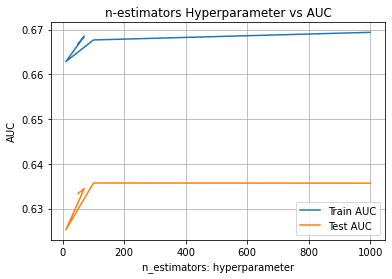

In [50]:
n_estimators = [1000,100,10,70,50]
Train_RFN_score=[]
Test_RFN_score=[]
for i in tqdm(n_estimators):
    rf = RandomForestClassifier(max_depth=9 ,n_estimators=i, min_samples_leaf=70, n_jobs=-1)
    rf.fit(X_train, Y_train)
        
    Train_pred= (rf.predict_proba(X_train)[:,1])
    Test_pred= (rf.predict_proba(X_test)[:,1])
        
    Train_RFN_score.append(roc_auc_score(Y_train, Train_pred))
    Test_RFN_score.append(roc_auc_score(Y_test,Test_pred))

plt.plot(n_estimators,Train_RFN_score, label='Train AUC')
plt.plot(n_estimators,Test_RFN_score, label='Test AUC')


plt.legend()
plt.xlabel("n_estimators: hyperparameter")
plt.ylabel("AUC")
plt.title("n-estimators Hyperparameter vs AUC")
plt.grid()
plt.show()    


#### Testing The Performance of Best Model

In [51]:
rf = RandomForestClassifier(max_depth= 9 ,n_estimators=1000, min_samples_leaf=70, n_jobs=-1)
rf.fit(X_train, Y_train)
Test_pred= (rf.predict_proba(X_test)[:,1])
print((roc_auc_score(Y_test, Test_pred)))

0.6353351203611637


In [52]:
Feat_Imp = rf.feature_importances_
col_names=list(X_train.columns)
scores=[]
for ind,imp_val in enumerate(Feat_Imp):
    scores.append(imp_val)

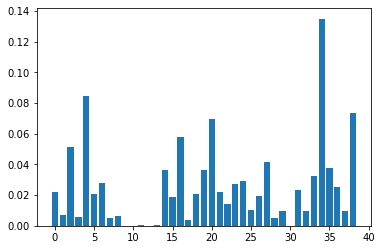

In [53]:
plt.bar([x for x in range(len(Feat_Imp))], Feat_Imp)
plt.show()

In [54]:
Score_Ind = np.argsort(scores)
Score_Ind = Score_Ind[::-1]

In [55]:
print("Top 8 Features: ")
print("\n")
for i in Score_Ind[0:8]:
    
    print("Feature : {} || Score : {}".format(col_names[i],scores[i]))

Top 8 Features: 


Feature : ps_car_13 || Score : 0.13488331534625672
Feature : ps_ind_05_cat || Score : 0.08438052183192549
Feature : ps_reg_sum || Score : 0.07374704015111803
Feature : ps_reg_03 || Score : 0.06936328546365252
Feature : ps_ind_17_bin || Score : 0.058104634140881406
Feature : ps_ind_03 || Score : 0.05100704487104448
Feature : ps_car_07_cat || Score : 0.04179134763218203
Feature : ps_car_14 || Score : 0.03761166066971694


#### Predicting on Test Data

In [57]:
TEST_PRED=rf.predict_proba(test)[:,1]
submission = pd.DataFrame()
submission['id'] = test_id
submission['target'] = TEST_PRED
submission.to_csv('randomforest_FE_AUC_submission.csv', index = False)

### Decision Tree Classifier

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [01:02<00:00, 15.55s/it]


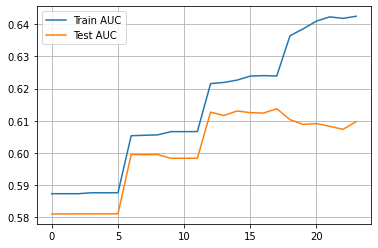

In [58]:
from sklearn.tree import DecisionTreeClassifier
min_samples_leaf = [5,10,20,30,45,120]
max_depth = [3,5,7,9]
Train_DT_Score = []
Test_DT_Score = []
for i in tqdm(max_depth):
    for j in min_samples_leaf:
        DTClassifier = DecisionTreeClassifier(max_depth=i, min_samples_leaf=j)
        DTClassifier.fit(X_train, Y_train)
        
        Train_pred= (DTClassifier.predict_proba(X_train)[:,1])
        Test_pred= (DTClassifier.predict_proba(X_test)[:,1])
        
        Train_DT_Score.append(roc_auc_score(Y_train, Train_pred))
        Test_DT_Score.append(roc_auc_score(Y_test,Test_pred))
        
plt.plot(Train_DT_Score, label='Train AUC')
plt.plot(Test_DT_Score, label='Test AUC')


plt.legend()
plt.grid()
plt.show()      

In [59]:
DTClassifier = DecisionTreeClassifier(max_depth=7, min_samples_leaf=20)
DTClassifier.fit(X_train, Y_train)
Test_pred= (DTClassifier.predict_proba(X_test)[:,1])
print((roc_auc_score(Y_test, Test_pred)))       

0.6130515052124275


### Predicting on Test Data

In [60]:
TEST_PRED=DTClassifier.predict_proba(test)[:,1]
submission = pd.DataFrame()
submission['id'] = test_id
submission['target'] = TEST_PRED
submission.to_csv('DecisonTree_FE_AUC_submission.csv', index = False)

### Adaboost Classifier

100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [16:05<00:00, 193.12s/it]


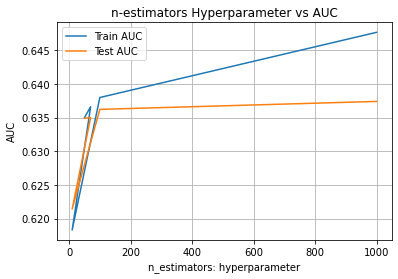

In [61]:
from sklearn.ensemble import AdaBoostClassifier
n_estimators = [1000,100,10,70,50]
Train_ada_score=[]
Test_ada_score=[]
for i in tqdm(n_estimators):
        ADAClassifier = AdaBoostClassifier(n_estimators=i)
        ADAClassifier.fit(X_train, Y_train)
        
        Train_pred= (ADAClassifier.predict_proba(X_train)[:,1])
        Test_pred= (ADAClassifier.predict_proba(X_test)[:,1])
        
        Train_ada_score.append(roc_auc_score(Y_train, Train_pred))
        Test_ada_score.append(roc_auc_score(Y_test,Test_pred))
        
plt.plot(n_estimators,Train_ada_score, label='Train AUC')
plt.plot(n_estimators,Test_ada_score, label='Test AUC')


plt.legend()
plt.xlabel("n_estimators: hyperparameter")
plt.ylabel("AUC")
plt.title("n-estimators Hyperparameter vs AUC")
plt.grid()
plt.show()

#### Testing the Best Model Performance

In [62]:
ADAClassifier = AdaBoostClassifier(n_estimators=100)
ADAClassifier.fit(X_train, Y_train)
Test_pred= (ADAClassifier.predict_proba(X_test)[:,1])
print((roc_auc_score(Y_test, Test_pred)))

0.6362287751405631


#### Predicting on Test Data

In [63]:
TEST_PRED=ADAClassifier.predict_proba(test)[:,1]
submission = pd.DataFrame()
submission['id'] = test_id
submission['target'] = TEST_PRED
submission.to_csv('Adaboost_FE_AUC_submission.csv', index = False)

#### XG Boost 

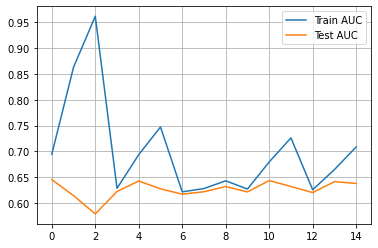

In [64]:
import xgboost as xgb
from tqdm.notebook import tqdm

n_estimators = [1000,100,10,70,50]
learning_rate = [0.01,0.1,0.3]
Train_Score = []
Test_Score = []

for i in tqdm(n_estimators):
    for j in learning_rate:
        xgb_model = xgb.XGBClassifier(n_estimators = i, learning_rate=j,n_jobs =-1)
        xgb_model.fit(X_train, Y_train)
        
        Train_pred=xgb_model.predict_proba(X_train)[:,1]
        Test_pred=xgb_model.predict_proba(X_test)[:,1]
        Train_score.append( roc_auc_score(Y_train,Train_pred))
        Test_score.append( roc_auc_score(Y_test,Test_pred))

plt.plot(Train_score, label='Train AUC')
plt.plot(Test_score, label='Test AUC')


plt.legend()
plt.grid()
plt.show()       
        
    

#### Fine Tuning the Model

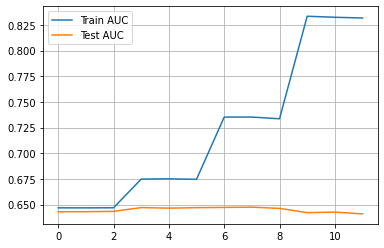

In [65]:
max_depth = [3,5,7,9]
subsample = [0.70,0.8,0.9]
Train_score = []
Test_score = []

for i in tqdm(max_depth):
    for j in subsample:
        xgb_model = xgb.XGBClassifier(max_depth=i,subsample=j,n_estimators = 1000, learning_rate=0.01,n_jobs =-1)
        xgb_model.fit(X_train, Y_train)
        Train_pred=xgb_model.predict_proba(X_train)[:,1]
        Test_pred=xgb_model.predict_proba(X_test)[:,1]
        
        Train_score.append( roc_auc_score(Y_train,Train_pred))
        Test_score.append( roc_auc_score(Y_test,Test_pred))

plt.plot(Train_score, label='Train AUC')
plt.plot(Test_score, label='Test AUC')


plt.legend()
plt.grid()
plt.show()

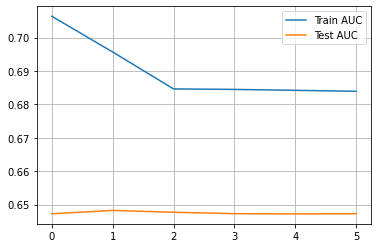

In [66]:
min_child_weight = [29,53,98,99,100,101]
Train_score = []
Test_score = []

for i in tqdm(min_child_weight):
    xgb_model = xgb.XGBClassifier(min_child_weight=i,max_depth=7,subsample=0.7,n_estimators = 1000, learning_rate=0.01,n_jobs =-1)
    xgb_model.fit(X_train, Y_train)
    
    Train_pred=xgb_model.predict_proba(X_train)[:,1]
    Test_pred=xgb_model.predict_proba(X_test)[:,1]
    
    Train_score.append(  roc_auc_score(Y_train,Train_pred))
    Test_score.append(  roc_auc_score(Y_test,Test_pred))
    
        
plt.plot(Train_score, label='Train AUC')
plt.plot(Test_score, label='Test AUC')


plt.legend()
plt.grid()
plt.show()

#### Testing the Best Model Performance

In [68]:
xgb_model = xgb.XGBClassifier(max_depth=7,subsample=0.7,n_estimators = 1000, learning_rate=0.01,min_child_weight=99,n_jobs =-1)
xgb_model.fit(X_train, Y_train)
Test_pred=xgb_model.predict_proba(X_test)[:,1]
print(roc_auc_score(Y_test,Test_pred))

0.6472882757425605


#### Predicting on Test Data

In [69]:
TEST_pred=xgb_model.predict_proba(test)[:,1]
submission = pd.DataFrame()
submission['id'] = test_id
submission['target'] = TEST_pred
submission.to_csv('xgboost_FE_AUC_submission.csv', index = False)

In [71]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [91]:
NModel = Sequential ()

NModel.add(Dense(256, activation='relu',input_shape=(X_train.shape[1],)))
NModel.add(Dense(64, activation = 'relu'))
NModel.add(Dense(512, activation = 'relu'))
NModel.add(Dense(512, activation = 'relu'))
NModel.add(Dense(256, activation = 'relu'))
NModel.add(Dense(1,activation='sigmoid'))

NModel.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 256)               10240     
_________________________________________________________________
dense_33 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_34 (Dense)             (None, 512)               33280     
_________________________________________________________________
dense_35 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_36 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 257       
Total params: 454,209
Trainable params: 454,209
Non-trainable params: 0
________________________________________________

In [92]:
NModel.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics=['accuracy'])
NModel.fit(X_train,Y_train, batch_size=128,epochs =30, validation_data = [X_test,Y_test])

Train on 535690 samples, validate on 59522 samples
Epoch 1/30
535690/535690 [==============================] - 83s 155us/step - loss: 0.1562 - accuracy: 0.9633 - val_loss: 0.1562 - val_accuracy: 0.9636
Epoch 2/30
535690/535690 [==============================] - 77s 144us/step - loss: 0.1541 - accuracy: 0.9635 - val_loss: 0.1538 - val_accuracy: 0.9636
Epoch 3/30
535690/535690 [==============================] - 77s 145us/step - loss: 0.1538 - accuracy: 0.9635 - val_loss: 0.1534 - val_accuracy: 0.9636
Epoch 4/30
535690/535690 [==============================] - 76s 141us/step - loss: 0.1535 - accuracy: 0.9635 - val_loss: 0.1529 - val_accuracy: 0.9636
Epoch 5/30
535690/535690 [==============================] - 75s 140us/step - loss: 0.1533 - accuracy: 0.9635 - val_loss: 0.1539 - val_accuracy: 0.9636
Epoch 6/30
535690/535690 [==============================] - 75s 140us/step - loss: 0.1533 - accuracy: 0.9635 - val_loss: 0.1534 - val_accuracy: 0.9636
Epoch 7/30
535690/535690 [=================

In [95]:
from tensorflow.keras.models import Model,load_model
pred=NModel.predict(test,batch_size=120,verbose=1)

892816/892816 [==============================] - 5s 6us/step


In [96]:
pred

array([[0.02636923],
       [0.02030402],
       [0.02207739],
       ...,
       [0.02625275],
       [0.01909554],
       [0.02471536]], dtype=float32)

In [97]:
submission = pd.DataFrame()
submission['id'] = test_id
submission['target'] = pred
submission.to_csv('NN_submission.csv', index = False)

### Custom Coding

#### Splitting the Data into 80:20

In [46]:
Train, Test,Train_Labels,Test_Labels =train_test_split(i,c,test_size=0.2)

In [47]:
print("shape of the Train",Train.shape)
print("shape of the Train",Train_Labels.shape)
print("shape of the Test",Test.shape)
print("shape of the Train",Test_Labels.shape)

shape of the Train (466277, 41)
shape of the Train (466277,)
shape of the Test (116570, 41)
shape of the Train (116570,)


#### Function For Custom Model

In [87]:
from sklearn.tree import DecisionTreeClassifier
def custom_block(num_estimators, X_train, Y_train, X_Test):
    
    print("Loading Data . . .")
    print("\nSplitting Data . . .")
    
    X_Train, X_Meta, Y_Train, Y_Meta= train_test_split(X_train,Y_train,test_size=0.5)

    X_Train.reset_index(inplace=True)
    Y_Train = Y_Train.to_frame()

    Y_Train.reset_index(inplace=True)

    Train_Data = []
    Labels_Data = []
    
    print("\nSampling Data With Replacement . . .")
    
    for i in range(0, num_estimators):
        Train_Data.append(X_Train.sample(frac=.80))
        
    for i in range(0,len(Train_Data)):
        Labels_T = []
        for j in (list(Train_Data[i]["index"])):
            
            Labels_T.append(int(Y_Train['target'][Y_Train['index']==j]))
        Train_Data[i].drop("index",axis=1,inplace=True)
            
        Labels_Data.append(Labels_T)
    
    Train_Score = []
    
    print("\nTraining Models . . .")
    
    Meta_Model_Data = []
    Test_Model_Data = []
    
    for i in range(0,len(Train_Data)):
        
        DT= DecisionTreeClassifier()
        DT.fit(Train_Data[i],Labels_Data[i])
        Predictions = DT.predict(X_Meta)
        TPredictions = DT.predict(X_Test)
        
        Meta_Model_Data.append(Predictions)
        Test_Model_Data.append(TPredictions)
        
    print("\nTraining Meta Model . . .")
    Val = []
    for i in range(0,len(Predictions)):
        Val.append(0)
    
    Meta_Data=pd.DataFrame({"Sum": Val})
    
    for i in range(0,len(Meta_Model_Data)):
        
        Meta_Data[str(i)]=Meta_Model_Data[i]
        
        Meta_Data["Sum"] = Meta_Data[str(i)]+Meta_Data["Sum"]
    
    print("\nPredicting on Test Data")
    
    Val = []
    for i in range(0,len(TPredictions)):
        Val.append(0)
    
    Test_Data=pd.DataFrame({"Sum": Val})
    
    for i in range(0,len(Test_Model_Data)):
        
        Test_Data[str(i)]=Test_Model_Data[i]
        
        Test_Data["Sum"] = Test_Data[str(i)]+Test_Data["Sum"]
    
    Results=[]
   

    for i in list(Test_Data["Sum"]):
        if i>2:
            Results.append(1)
        else:
            Results.append(0)
    
    return Results
    
    
    

In [88]:
Results = custom_block(num_estimators=5, X_train = Train,Y_train = Train_Labels, X_Test = Test)

Loading Data . . .

Splitting Data . . .

Sampling Data With Replacement . . .

Training Models . . .

Training Meta Model . . .

Predicting on Test Data


In [89]:
Results

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [65]:
from lightgbm import LGBMClassifier


lgb_model = LGBMClassifier(feature_fraction = 0.9, min_data_in_leaf=24, lambda_l1=10, bagging_fraction= 0.5, learning_rate= 0.01, num_leaves= 24)
lgb_model.fit(X_train.values, Y_train)
test_pred=lgb_model.predict_proba(X_test)[:,1]
print( Gini(Y_test,test_pred))

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
0.2880036516915018


In [66]:
TEST_pred=lgb_model.predict_proba(test)[:,1]
submission = pd.DataFrame()
submission['id'] = test_id
submission['target'] = TEST_pred
submission.to_csv('lightbgm_submission.csv', index = False)

In [32]:
from lightgbm import LGBMClassifier
lgb_model_1 = LGBMClassifier(bagging_fraction =1, bagging_freq =1, feature_fraction =0.228928379, lambda_l1 =2.66438287, lambda_l2 =1.25103924, learning_rate =1.6958276, max_bin =18, max_depth =14, min_data_in_leaf =219, min_gain_to_split =2.5, min_sum_hessian_in_leaf =15.24851, num_iterations =13, num_leaves =500)
lgb_model_1.fit(X_train.values, Y_train)
test_pred=lgb_model_1.predict_proba(X_test)[:,1]
print( Gini(Y_test,test_pred))

[LightGBM] [Warning] feature_fraction is set=0.228928379, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.228928379
[LightGBM] [Warning] min_data_in_leaf is set=219, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=219
[LightGBM] [Warning] min_gain_to_split is set=2.5, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.5
[LightGBM] [Warning] lambda_l1 is set=2.66438287, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.66438287
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=15.24851, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=15.24851
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] lambda_l2 is set=1.25103924, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.25103924
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
0.1921

In [68]:
TEST_pred=lgb_model_1.predict_proba(test)[:,1]
submission = pd.DataFrame()
submission['id'] = test_id
submission['target'] = TEST_pred
submission.to_csv('lgbmodel_submission.csv', index = False)

## Kaggle submission

<img src="1.png">

<img src="2.png">

<img src="3.png">

<img src="4.png">

<img src="5.png">

<img src="6.png">

<img src="7.png">

In [9]:
from prettytable import PrettyTable
x=PrettyTable(['S.no','Model','Test Score'])
x.add_row(['1','RANDOM FOREST',0.271255])
x.add_row(['2','DT CLASSIFIER',0.241160])
x.add_row(['3','ADA BOOST',0.266021])
x.add_row(['4','XG BOOST',0.284206])
x.add_row(['5','LIGHT GBM',0.288003])
x.add_row(['6','Neural Network ',0.9636])
print(x.get_string(start=0,end=6))


+------+-----------------+------------+
| S.no |      Model      | Test Score |
+------+-----------------+------------+
|  1   |  RANDOM FOREST  |  0.271255  |
|  2   |  DT CLASSIFIER  |  0.24116   |
|  3   |    ADA BOOST    |  0.266021  |
|  4   |     XG BOOST    |  0.284206  |
|  5   |    LIGHT GBM    |  0.288003  |
|  6   | Neural Network  |   0.9636   |
+------+-----------------+------------+


#### Conclusion

- Inaccuracies in car insurance company’s claim predictions raise the cost of insurance for good drivers and reduce the price for bad ones.
- In this case study we have to build a model that will predict the probability whether the driver will file an insurance claim next year.

- The Dataset is Highly Imbalanced. i.e 96.36 : 3.64
- We have plotted count plots for Independent Binary Features in most of the plots the count for the target 0 is high and only in one case ps_ind_16_bin the count for the target 1 is high.
- For the Distribution of Binary Features With Respect To Target Column Some Features like ps_ind_bin_10, ps_ind_bin_11, ps_ind_bin_13 do have only 1 binary value here we have found No Inferences can be drawn out from these plots and One of the reason may even be the Imabalced Data.
- For the  count plot for the Calculated Binary feature The Distribution of these features is also imbalanced. Most of the features do have dominant value.
- For the Distribution of Calculated Binary Features With Respect To Target Column The probability of the Client Not Claiming the Insurance Policy is Relatively High, if ps_calc_15_bin is 1 and it is not possible to draw the exact inferences as the dataset is Highly Imbalanced and the Dataset is Generated Random Data.
- For the count plot for Independent Categorical feature as the Dataset is uneven distribution of the Categorical Features.ps_ind_02_cat the dominant category is 1 and ps_ind_05_cat the dominant category is 0.
- For the Distribution of Independent Categorical Features With Respect To Target Column and No Inferences can be drawn out.
- For the count plots and we observed that ps_car_11_cat has higher number of Categorical Values and All the Categorical columns are not evenly distributed.
- For the Distribution of Car Categorical Features With Respect To Target Column and we have no inferences from the plot
- For the Count plot for the Independent features and in this ps_ind_01 and ps_ind_14 are highly imbalanced and ps_ind_03 and ps_ind_15 is somewhat balanced and no inferences can be found from the above plots
- Distribution of Independent Categorical Features With Respect To Target Column as this dataset is highly imbalanced dataset we cannot find any inferences from the above plots.
- For the count plots for the region wise we have 3 regions in the dataset and in ps_reg_03 there are 5004 unique values in it and we observe no inferences from the above plots
- For the Distribution of Independent Categorical Features With Respect To Target Column and we found no inferences from the above plots
- In ps_calc_05, In ps_calc_06, In ps_calc_07, In ps_calc_08, In ps_calc_09, In ps_calc_10, In ps_calc_11, In ps_calc_12, In ps_calc_13, In ps_calc_14 in all these calculated features most of the data points are concentrated at different levels and the calculated features are randomly generated datapoints in the data
- Distribution of Calculated Features With Respect To Target Column These Features are mentioned as continous, but most of them do have very fewer values, Some Features from the above can be treated as Discrete Features,Even these features are unevenly distributed and finally No Useful Inferences can be drawn out.
- For the boxplots for calculated features,in this as the interquartile range (IQR) and percentiles are overlapping so No inferences cannot be drawn from the above boxplot.
- Finally in the correlation part There are some features that show negative correlation, Not highly correlated,Positive correlation is also very rare and weak and Most of the features are independent features
- For the Feature Engineering we have removed all the calculated features as they are randomly generated in the dataset because they won't show any significant impact on the target and for the Individual binary features we have add all the binary features and added a new column and for the regions we taken the average of the regions.
- After training all the models ,I have got good kaggle score in XG-BOOST.